# Predictive Modeling of Breast Cancer Recurrence

Breast cancer recurrence remains a critical concern in oncology, prompting the need for robust predictive models to identify patterns and risk factors associated with recurrence events. In this comprehensive analysis project, we delve into a dataset encompassing diverse attributes related to breast cancer patients, ranging from demographic information to clinical characteristics. Our primary focus is on discerning the impact of these attributes on the recurrence events of breast cancer. The analysis unfolds in two distinct phases: an exploratory data analysis (EDA) investigating associations between individual attributes and recurrence events, followed by the deployment of various machine learning algorithms for predictive modeling. The models, including decision trees, logistic regression, Naive Bayes, K Nearest Neighbors, and Random Forests, are evaluated under different conditions, considering class imbalance and feature selection. Through this multifaceted approach, our goal is to not only develop predictive models but also to gain insights into the nuanced interplay between patient-specific factors and breast cancer recurrence, contributing to the ongoing efforts in personalized medicine and oncological research.

# Loading Data and Dataset Understanding

In [1]:
# import essential libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# load the dataset
data = pd.read_csv('recurrent_breastcancer.csv')

# check the dimension of the dataset
print('Dimension of dataset: ', data.shape)

# check the attributes in the dataset
print('Attributes in the dataset: ', data.columns.values)

# view first 5 rows of the dataset
data.head()

Dimension of dataset:  (286, 10)
Attributes in the dataset:  ['age' 'menopause' 'tumor-size' 'inv-nodes' 'node-caps' 'deg-malig'
 'breast' 'breast-quad' 'irradiat' 'target']


,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,target
0,30-39,premeno,30-34,0-2,no,3,left,left_low,no,no-recurrence-events
1,40-49,premeno,20-24,0-2,no,2,right,right_up,no,no-recurrence-events
2,40-49,premeno,20-24,0-2,no,2,left,left_low,no,no-recurrence-events
3,60-69,ge40,15-19,0-2,no,2,right,left_up,no,no-recurrence-events
4,40-49,premeno,0-4,0-2,no,2,right,right_low,no,no-recurrence-events


#### Attributes Description:

1. age: Patient's age categorized into ranges (e.g., 10-19, 20-29, etc.).
2. menopause: Menopausal status, characterized as lt40 (less than 40), ge40 (greater equal to 40), or premeno.
3. tumor-size: Size of the tumor, categorized into specific ranges.
4. inv-nodes: Number of involved lymph nodes, grouped into ranges.
5. node-caps: Presence or absence of node caps (yes or no).
6. deg-malig: Degree of malignancy, graded as 1, 2, or 3.
7. breast: The affected breast, identified as left or right.
8. breast-quad: Quadrant of the breast affected (e.g., left-up, right-low).
9. irradiat: Whether the patient underwent irradiation (yes or no).
10. target: no-recurrence-events: Instances indicating no recurrence of breast cancer; recurrence-events: Instances indicating a recurrence of breast cancer.

#### Additional Notes:

**1. Why the number of lymph nodes involved is measured?**
The number of lymph nodes involved in cancer data refers to the count of lymph nodes that have been affected or invaded by cancer cells. The presence of cancer cells in lymph nodes is an important indicator of disease progression and may affect the staging and prognosis of the cancer. The number of lymph nodes involved is often assessed during cancer diagnosis and treatment, particularly in surgeries where lymph nodes are removed and examined for the presence of cancer cells.

**2. What is the presence and absence of node caps?** 
In cancer data, the term 'presence of node caps' refers to the existence or absence of involvement of the node caps in a tumor or cancerous growth. Specifically, node caps often refer to the outer covering or capsule that surrounds lymph nodes. The variable indicating the presence or absence of node caps typically categorizes patients into two groups:

- **Presence of Node Caps (Yes):** Indicates that the tumor has breached or involves the node caps.
- **Absence of Node Caps (No):** Indicates that the tumor does not involve the node caps; the node caps remain intact.

The presence or absence of node caps is an important clinical feature as it can provide insights into the extent of tumor infiltration and its potential impact on cancer prognosis. Understanding whether the tumor has breached the node caps can influence treatment decisions and contribute to the staging of cancer, which helps guide appropriate medical interventions.

#### Data Types for the Attributes:

1. Ordinal data:
- age
- tumor-size
- inv-nodes
- deg-malig

2. Nominal data:
- menopause
- node-caps
- breast
- breast-quad
- irradiat
- target (*the labels)

In [3]:
# top level overview of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          286 non-null    object
 1   menopause    286 non-null    object
 2   tumor-size   286 non-null    object
 3   inv-nodes    286 non-null    object
 4   node-caps    278 non-null    object
 5   deg-malig    286 non-null    int64 
 6   breast       286 non-null    object
 7   breast-quad  285 non-null    object
 8   irradiat     286 non-null    object
 9   target       286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


# Missing Value Analysis

age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      8
deg-malig      0
breast         0
breast-quad    1
irradiat       0
target         0
dtype: int64


<Axes: >

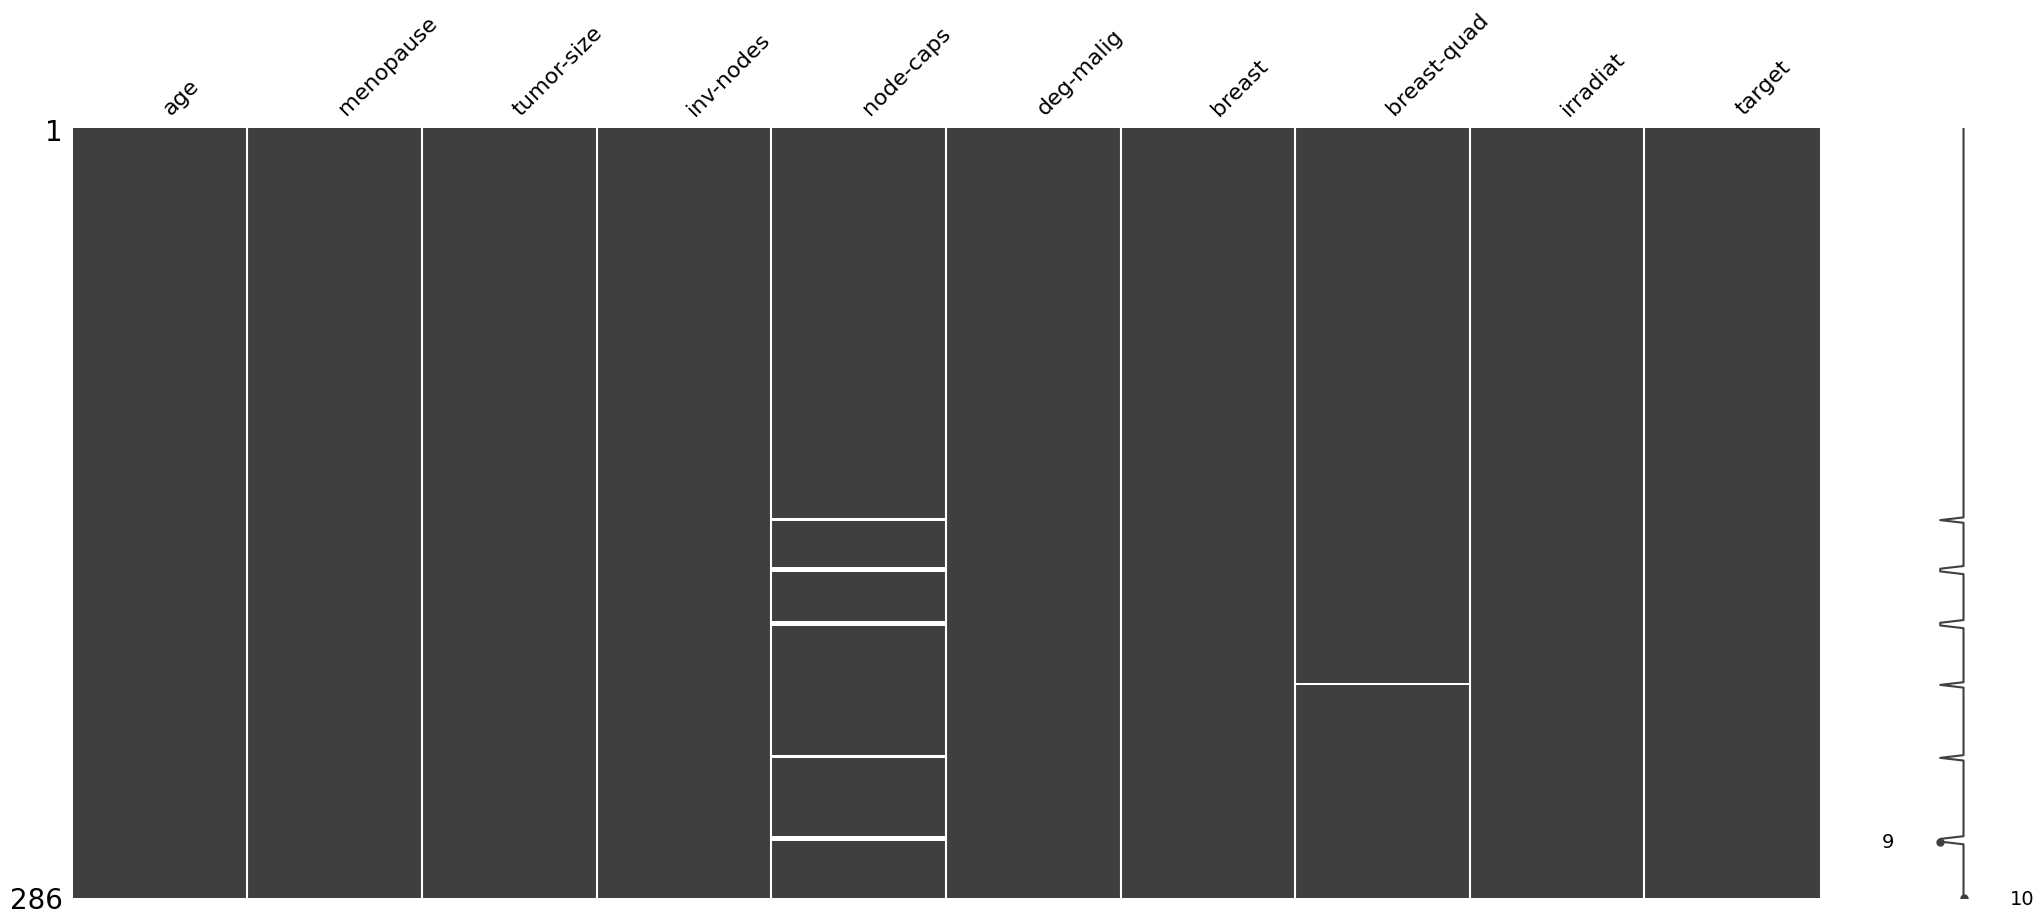

In [4]:
# missing value analysis
import missingno as msno

# check the number of missing value in each feature
print(data.isna().sum())

msno.matrix(data)

# Data Cleaning

In [5]:
# unique value in ordinal features
ordinal = ['age','tumor-size','inv-nodes','deg-malig']

for values in data[ordinal].columns:
    print(values, '||', data[values].unique())

age || ['30-39' '40-49' '60-69' '50-59' '70-79' '20-29']
tumor-size || ['30-34' '20-24' '15-19' '0-4' '25-29' '50-54' '10-14' '40-44' '35-39'
 '5-9' '45-49']
inv-nodes || ['0-2' '6-8' '9-11' '3-5' '15-17' '12-14' '24-26']
deg-malig || [3 2 1]


In [6]:
# unique value in nominal features
nominal = ['menopause','node-caps','breast','breast-quad','irradiat']

for values in data[nominal].columns:
    print(values, '||', data[values].unique())

menopause || ['premeno' 'ge40' 'lt40']
node-caps || ['no' 'yes' nan]
breast || ['left' 'right']
breast-quad || ['left_low' 'right_up' 'left_up' 'right_low' 'central' nan]
irradiat || ['no' 'yes']


In [7]:
# sort the unique value in ordinal data in order
data['age'] = pd.Categorical(data['age'], ordered=True, 
                             categories=['20-29','30-39','40-49','50-59','60-69','70-79'])

data['tumor-size'] = pd.Categorical(data['tumor-size'], ordered=True,
                                   categories=['0-4','5-9','10-14','15-19','20-24','25-29','30-34','35-39','40-44','45-49','50-54'])

data['inv-nodes'] = pd.Categorical(data['inv-nodes'], ordered=True,
                                  categories=['0-2','3-5','6-8','9-11','12-14','15-17','24-26'])

data['deg-malig'] = pd.Categorical(data['deg-malig'], ordered=True,
                                 categories=[1,2,3])

In [8]:
# rename the 'target' columns
data.rename({'target':'Recurrence_Event'}, axis=1, inplace=True)

# simplify the unique value in the 'target' column
data['Recurrence_Event'] = ['No' if i == 'no-recurrence-events' else 'Yes' for i in data['Recurrence_Event']]

In [9]:
from sklearn.model_selection import train_test_split

# split the dataset into training and test datasets
train, test = train_test_split(data, test_size=0.2, random_state=122)

# check the dimensions of the training and test datasets
print('Dimension of training data: ', train.shape)
print('Dimension of test data: ', test.shape)

Dimension of training data:  (228, 10)
Dimension of test data:  (58, 10)


# Exploratory Data Analysis (EDA)

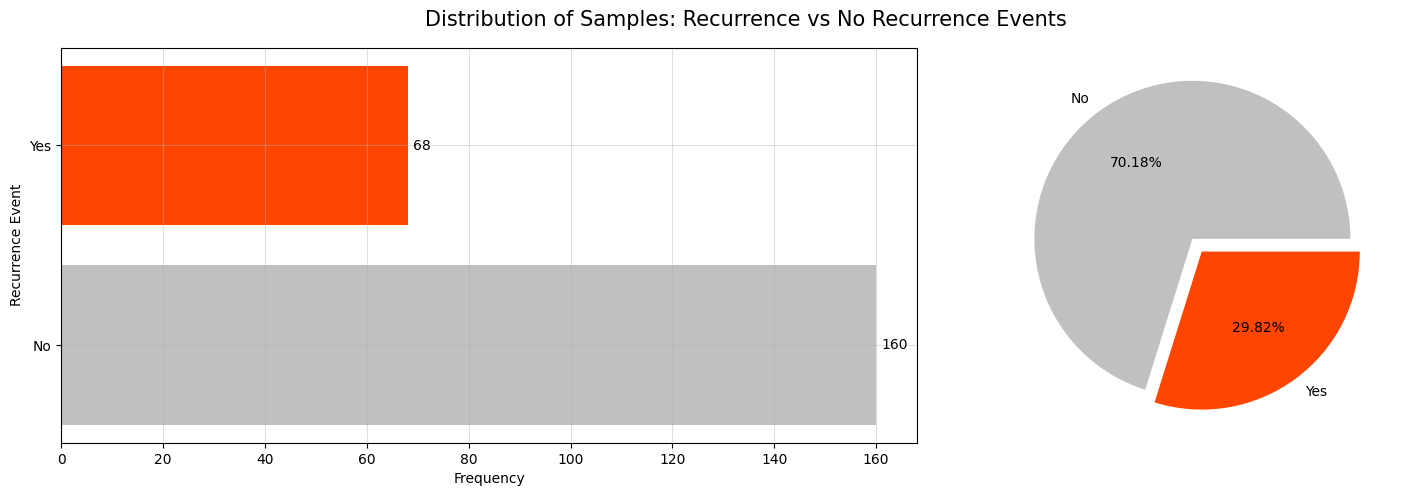

In [10]:
# distribution of targets
targets = train['Recurrence_Event'].value_counts()
colors = ['silver','orangered']

figure, axes = plt.subplots(1,2, figsize=(15,5), gridspec_kw={'width_ratios':[1.5,1]})
axes[0].barh(y=targets.index, width=targets.values, color=colors)
axes[0].set_xlabel('Frequency')
axes[0].set_ylabel('Recurrence Event')
axes[0].grid(alpha=0.4)

for index, values in enumerate(targets):
    axes[0].text(values+1, index, str(values), va='center')
    
axes[1].pie(targets.values, labels=targets.index, autopct='%.2f%%', explode=([0.05]*len(targets.index)), colors=colors)

figure.suptitle('Distribution of Samples: Recurrence vs No Recurrence Events', fontsize=15)
plt.tight_layout(pad=1)
plt.show()

In [11]:
# helper function to perform Chi-square test
from scipy.stats import chi2_contingency

def chi2test(feature, featname):
    # distribution of 'age' category in recurrence and no recurrence events
    plt.figure(figsize=(15,5))
    sns.countplot(data=train, x=train[feature], hue=train['Recurrence_Event'], palette=colors)
    plt.xlabel(featname)
    plt.ylabel('Frequency')
    plt.grid(alpha=0.4)
    plt.title(f'Distribution of {featname} Categories in Patients with Recurrent and Non-Recurrent Breast Cancer Events', fontsize=15)
    plt.show()

    # observed value
    contingency_table = pd.crosstab(train[feature], train['Recurrence_Event'])
    print('Observed value:')
    display(contingency_table)

    # chi-square test
    res = chi2_contingency(contingency_table)
    test_stat = round(res[0], 4)
    pvalue = round(res[1], 4)
    expected_freq = res[3]

    # compute the effect size (Cramer's V)
    N = np.sum(contingency_table.values)
    minimum_dimension = min(contingency_table.shape)-1
    effect_size = round(np.sqrt((test_stat/N) / minimum_dimension), 4) 

    # expected frequency
    print('Expected frequency:')
    display(pd.DataFrame(expected_freq, index=contingency_table.index, columns=contingency_table.columns))

    # display test result
    print('Test statistic: ', test_stat)
    print('Test p-value: ', pvalue)
    print('Effect size: ', effect_size)
    
    summary = {'Feature':feature, 'Test statistic':test_stat, 'Test p-value':pvalue, 'Effect Size':effect_size}
    return summary

#### Question 1 | Does the age of patients demonstrate a statistically significant association with the likelihood of breast cancer recurrence events?

- Null Hypothesis (H0): There is no statistically significant association between the age of patients and the likelihood of breast cancer recurrence events.
- Alternative Hypothesis (H1): There is a statistically significant association between the age of patients and the likelihood of breast cancer recurrence events.

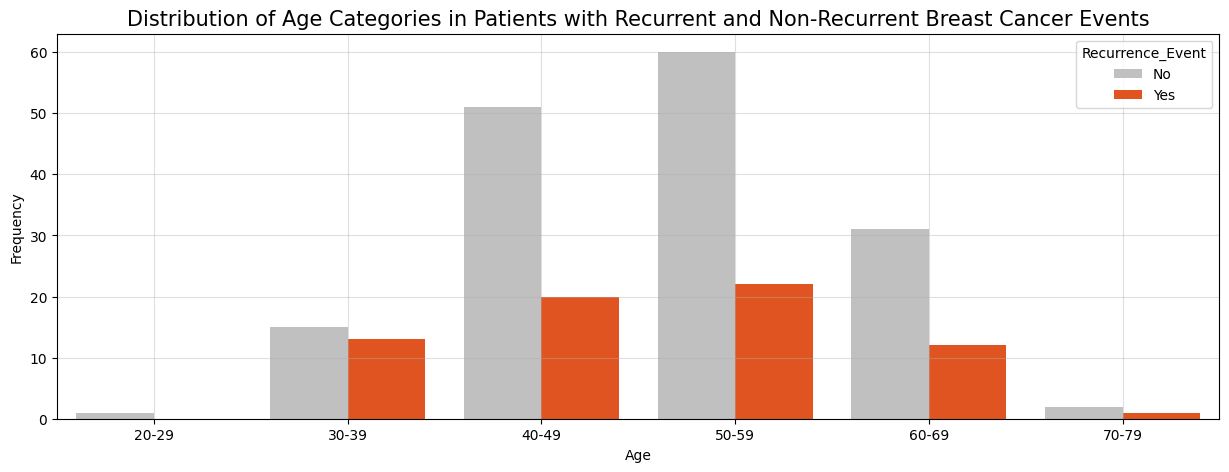

Observed value:


Recurrence_Event,No,Yes
age,,
20-29,1,0
30-39,15,13
40-49,51,20
50-59,60,22
60-69,31,12
70-79,2,1


Expected frequency:


Recurrence_Event,No,Yes
age,,
20-29,0.701754,0.298246
30-39,19.649123,8.350877
40-49,49.824561,21.175439
50-59,57.543860,24.456140
60-69,30.175439,12.824561
70-79,2.105263,0.894737


Test statistic:  4.651
Test p-value:  0.4599
Effect size:  0.1428


In [12]:
age = chi2test('age','Age')
test_summary = [age]

##### Statistical Test Analysis Interpretation:

The chi-square test was conducted to examine the association between age, treated as a categorical ordinal variable, and the occurrence of breast cancer recurrence events (yes or no). The analysis was based on observed and expected frequencies in different age groups. The chi-square test did not reveal a statistically significant association between age and breast cancer recurrence events (X² = 4.651, p = 0.4599). The effect size (Cramer's V = 0.1428) indicates a small association between age and recurrence events. While the statistical association is not pronounced, the effect size suggests a discernible yet small connection. It is crucial to weigh the practical significance of the findings. The small effect size implies a limited practical relevance, suggesting that the observed association may not carry substantial clinical or practical implications. In summary, the chi-square test results provide insufficient evidence to reject the null hypothesis of independence between age and breast cancer recurrence events. The observed association, though statistically non-significant, should be understood in light of the small effect size, indicating a constrained practical impact. Further investigations, including larger sample sizes or the inclusion of additional variables, may be warranted to achieve a more comprehensive understanding of the factors influencing breast cancer recurrence.

#### Question 2 | Does the menopausal status of patients demonstrate a statistically significant association with the likelihood of breast cancer recurrence events?

- Null Hypothesis (H0): There is no statistically significant association between menopausal status and the likelihood of breast cancer recurrence events.
- Alternative Hypothesis (H1): There is a statistically significant association between menopausal status and the likelihood of breast cancer recurrence events.

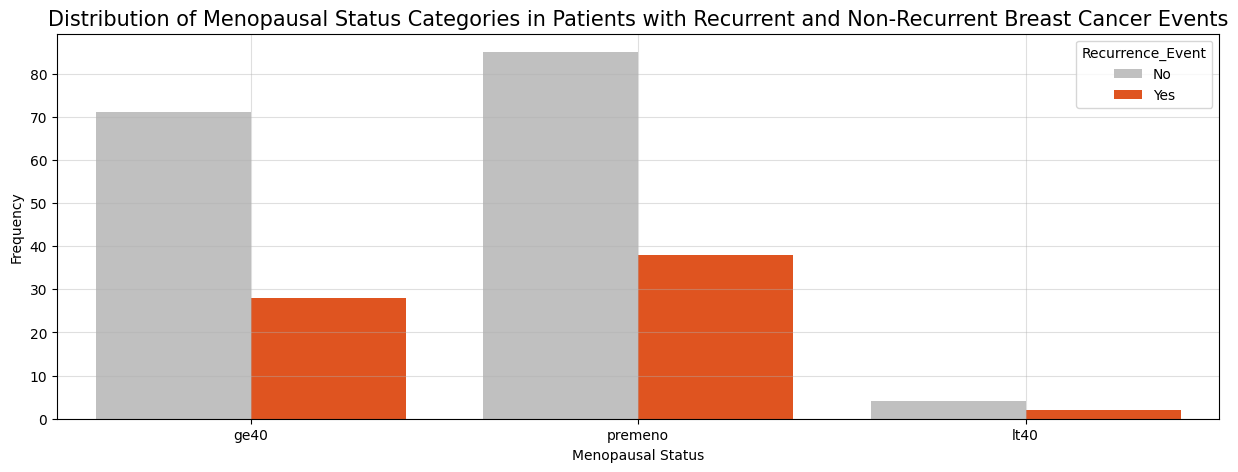

Observed value:


Recurrence_Event,No,Yes
menopause,,
ge40,71,28
lt40,4,2
premeno,85,38


Expected frequency:


Recurrence_Event,No,Yes
menopause,,
ge40,69.473684,29.526316
lt40,4.210526,1.789474
premeno,86.315789,36.684211


Test statistic:  0.215
Test p-value:  0.8981
Effect size:  0.0307


In [13]:
menopause = chi2test('menopause','Menopausal Status')
test_summary.append(menopause)

##### Statistical Test Analysis Interpretation:

A chi-square test was conducted to explore the potential association between menopausal status and the likelihood of breast cancer recurrence events. The analysis involved comparing observed and expected frequencies across different menopausal categories. The results of the chi-square test did not reveal a statistically significant association between menopausal status and breast cancer recurrence events (X² = 0.215, p = 0.8981). Additionally, the effect size, measured by Cramer's V (0.0307), indicates a very small association. The non-significant p-value suggests that any observed differences in recurrence events among menopausal categories are likely due to chance. Despite the lack of statistical significance, it is important to consider both statistical and practical significance in the interpretation of the results. In summary, there is insufficient evidence to reject the null hypothesis of independence between menopausal status and breast cancer recurrence events. The small effect size implies a minimal or negligible practical impact, and further investigations may be needed to ascertain the full scope of factors influencing breast cancer recurrence in relation to menopausal status.

#### Question 3 | Does the size of the tumor exhibit a statistically significant association with the likelihood of breast cancer recurrence events?

- Null Hypothesis (H0): There is no statistically significant association between the tumor size and the likelihood of breast cancer recurrence events.
- Alternative Hypothesis (H1): There is a statistically significant association between the tumor size and the likelihood of breast cancer recurrence events.

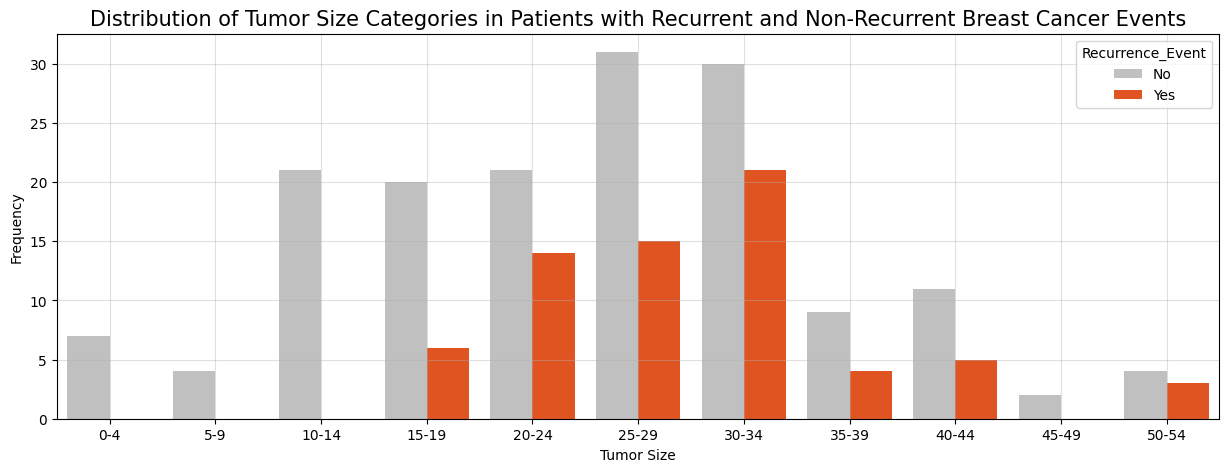

Observed value:


Recurrence_Event,No,Yes
tumor-size,,
0-4,7,0
5-9,4,0
10-14,21,0
15-19,20,6
20-24,21,14
25-29,31,15
30-34,30,21
35-39,9,4
40-44,11,5


Expected frequency:


Recurrence_Event,No,Yes
tumor-size,,
0-4,4.912281,2.087719
5-9,2.807018,1.192982
10-14,14.736842,6.263158
15-19,18.245614,7.754386
20-24,24.561404,10.438596
25-29,32.280702,13.719298
30-34,35.789474,15.210526
35-39,9.122807,3.877193
40-44,11.228070,4.771930


Test statistic:  20.6467
Test p-value:  0.0237
Effect size:  0.3009


In [14]:
tumorsize = chi2test('tumor-size','Tumor Size')
test_summary.append(tumorsize)

##### Statistical Test Analysis Interpretation:

A chi-square test was employed to investigate the potential association between tumor size and the likelihood of breast cancer recurrence events. The analysis involved contrasting observed and expected frequencies across various tumor size categories. The results of the chi-square test revealed a statistically significant association between tumor size and breast cancer recurrence events (X² = 20.6467, p = 0.0237). Additionally, the effect size, measured by Cramer's V (0.3009), indicates a moderate association. The statistically significant p-value suggests that the observed differences in recurrence events among tumor size categories are unlikely to have occurred by chance alone. The effect size, being moderate, implies a notable practical impact of tumor size on breast cancer recurrence. In summary, there is compelling evidence to reject the null hypothesis of independence between tumor size and breast cancer recurrence events. The moderate effect size emphasizes the practical relevance of tumor size as a factor influencing the likelihood of recurrence

#### Questiion 4 | Does the number of involved lymph nodes demonstrate a statistically significant association with the likelihood of breast cancer recurrence events?"

- Null Hypothesis (H0): There is no statistically significant association between the number of involved lymph nodes and the likelihood of breast cancer recurrence events.
- Alternative Hypothesis (H1): There is a statistically significant association between the number of involved lymph nodes and the likelihood of breast cancer recurrence events.

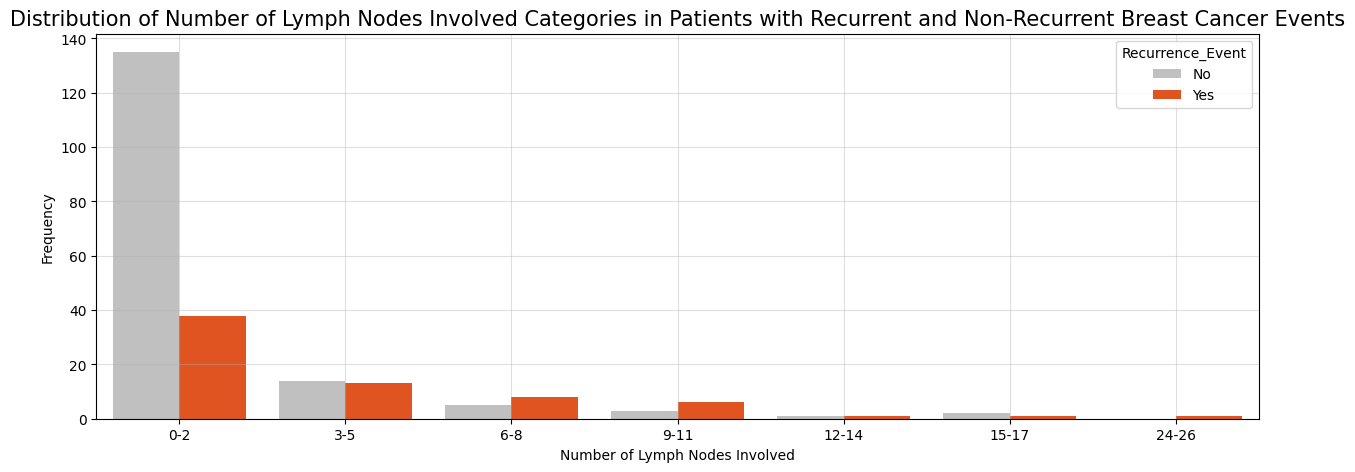

Observed value:


Recurrence_Event,No,Yes
inv-nodes,,
0-2,135,38
3-5,14,13
6-8,5,8
9-11,3,6
12-14,1,1
15-17,2,1
24-26,0,1


Expected frequency:


Recurrence_Event,No,Yes
inv-nodes,,
0-2,121.403509,51.596491
3-5,18.947368,8.052632
6-8,9.122807,3.877193
9-11,6.315789,2.684211
12-14,1.403509,0.596491
15-17,2.105263,0.894737
24-26,0.701754,0.298246


Test statistic:  24.2805
Test p-value:  0.0005
Effect size:  0.3263


{'Feature': 'inv-nodes',
 'Test statistic': np.float64(24.2805),
 'Test p-value': np.float64(0.0005),
 'Effect Size': np.float64(0.3263)}

In [15]:
chi2test('inv-nodes','Number of Lymph Nodes Involved')

##### Statistical Test Analysis Interpretation:

A chi-square test was conducted to investigate the potential association between the number of involved lymph nodes and the likelihood of breast cancer recurrence events. The analysis involved comparing observed and expected frequencies across different categories of lymph node involvement. The results of the chi-square test revealed a statistically significant association between the number of involved lymph nodes and breast cancer recurrence events (X² = 24.2805, p = 0.0005). Additionally, the effect size, measured by Cramer's V (0.3263), indicates a moderate association. The statistically significant p-value suggests that the observed differences in recurrence events among categories of lymph node involvement are unlikely to have occurred by chance alone. The moderate effect size underscores the practical relevance of the number of involved lymph nodes in influencing the likelihood of breast cancer recurrence. In summary, there is compelling evidence to reject the null hypothesis of independence between the number of involved lymph nodes and breast cancer recurrence events. The moderate effect size emphasizes the clinical significance of considering lymph node involvement as a factor influencing the likelihood of recurrence.

#### Groups Reclassification for Feature 'inv-nodes':

The majority of patients in the dataset exhibit involvement of less than 2 lymph nodes, with only a small portion showing more than 2 lymph nodes involved. To simplify the categories, the dataset is reclassified into two groups: 'Less than 2 lymph nodes involved (<2)' and 'More than 2 lymph nodes involved (>2)'

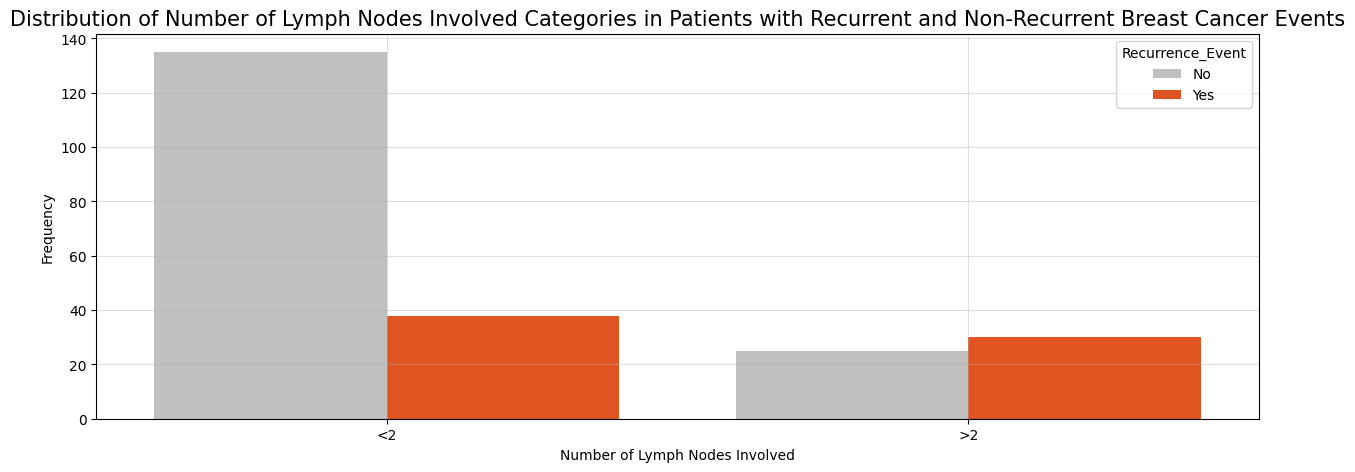

Observed value:


Recurrence_Event,No,Yes
inv-nodes,,
<2,135,38
>2,25,30


Expected frequency:


Recurrence_Event,No,Yes
inv-nodes,,
<2,121.403509,51.596491
>2,38.596491,16.403509


Test statistic:  19.6371
Test p-value:  0.0
Effect size:  0.2935


In [16]:
train['inv-nodes'] = ['<2' if cat == '0-2' else '>2' for cat in train['inv-nodes']]

# perform the chi-square test to check the association 
numnodes = chi2test('inv-nodes','Number of Lymph Nodes Involved')
test_summary.append(numnodes)

##### Statistical Test Analysis Interpretation:

A chi-square test was conducted to explore the association between the reclassified number of lymph nodes involved (categorized as <2 and >2) and the likelihood of breast cancer recurrence events. The analysis compared observed and expected frequencies in the two reclassified groups. The results revealed a statistically significant association between the number of lymph nodes involved and breast cancer recurrence events (X² = 19.6371, p = 0.0). The effect size, measured by Cramer's V (0.2935), indicates a moderate association. The statistically significant p-value suggests that the observed differences in recurrence events between the two groups are highly unlikely to be due to chance alone. The moderate effect size underscores the practical relevance of the number of lymph nodes in influencing the likelihood of breast cancer recurrence. In summary, there is strong evidence to reject the null hypothesis of independence between the number of lymph nodes involved and breast cancer recurrence events. The moderate effect size emphasizes the clinical significance of considering lymph node involvement as a factor influencing the likelihood of recurrence in breast cancer.

#### Question 5 | Does the presence of node caps exhibit a statistically significant association with the likelihood of breast cancer recurrence events?

- Null Hypothesis (H0): There is no statistically significant association between the presence of node caps and the likelihood of breast cancer recurrence events.
- Alternative Hypothesis (H1): There is a statistically significant association between the presence of node caps and the likelihood of breast cancer recurrence events.

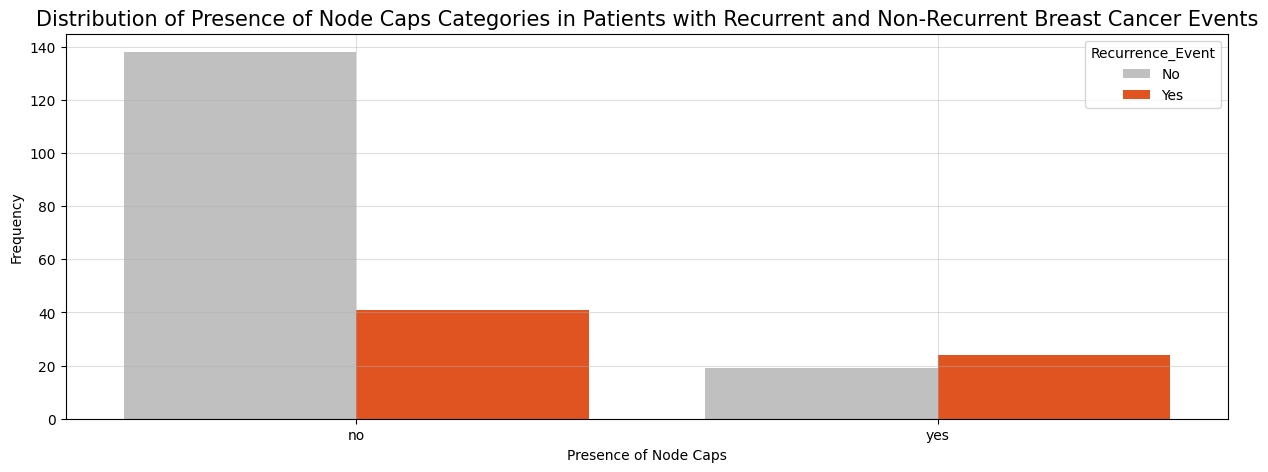

Observed value:


Recurrence_Event,No,Yes
node-caps,,
no,138,41
yes,19,24


Expected frequency:


Recurrence_Event,No,Yes
node-caps,,
no,126.59009,52.40991
yes,30.40991,12.59009


Test statistic:  16.5793
Test p-value:  0.0
Effect size:  0.2733


In [17]:
nodecap = chi2test('node-caps','Presence of Node Caps')
test_summary.append(nodecap)

##### Statistical Test Analysis Interpretation:

A chi-square test was conducted to investigate the potential association between the presence of node caps and the likelihood of breast cancer recurrence events. The analysis compared observed and expected frequencies in two categories: 'no node caps' and 'node caps present.' The results revealed a statistically significant association between the presence of node caps and breast cancer recurrence events (X² = 16.5793, p = 0.0). Additionally, the effect size, measured by Cramer's V (0.2733), indicates a moderate association. The statistically significant p-value suggests that the observed differences in recurrence events between the two categories are highly unlikely to have occurred by chance alone. The moderate effect size emphasizes the practical relevance of considering the presence of node caps as a factor influencing the likelihood of breast cancer recurrence. In summary, there is strong evidence to reject the null hypothesis of independence between the presence of node caps and breast cancer recurrence events. The moderate effect size further underscores the clinical significance of the presence of node caps in predicting the likelihood of recurrence in breast cancer.

#### Question 6 | Does the degree of malignancy exhibit a statistically significant association with the likelihood of breast cancer recurrence events?

- Null Hypothesis (H0): There is no statistically significant association between the degree of malignancy and the likelihood of breast cancer recurrence events.
- Alternative Hypothesis (H1): There is a statistically significant association between the degree of malignancy and the likelihood of breast cancer recurrence events.

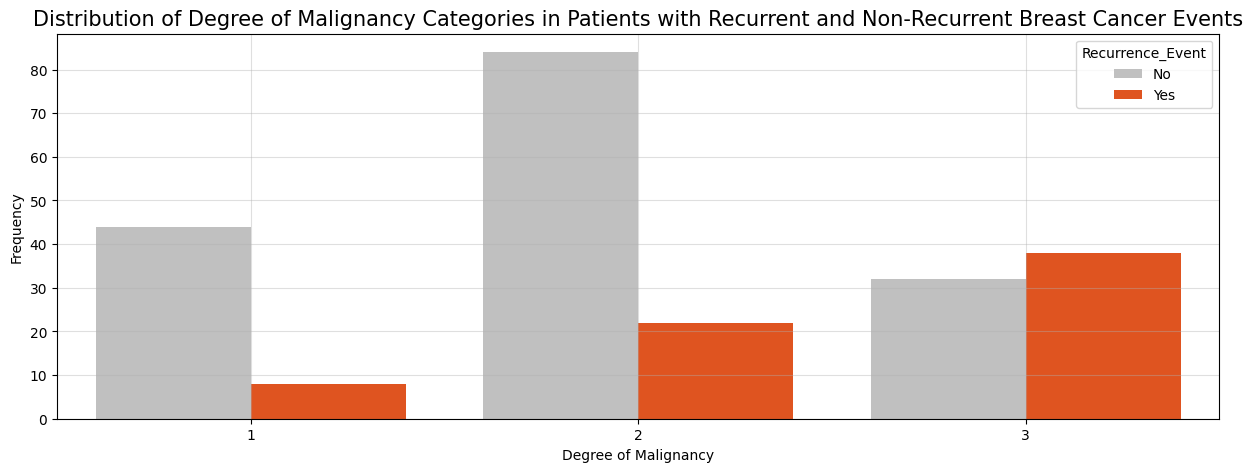

Observed value:


Recurrence_Event,No,Yes
deg-malig,,
1,44,8
2,84,22
3,32,38


Expected frequency:


Recurrence_Event,No,Yes
deg-malig,,
1,36.491228,15.508772
2,74.385965,31.614035
3,49.122807,20.877193


Test statistic:  29.3589
Test p-value:  0.0
Effect size:  0.3588


In [18]:
maligdegree = chi2test('deg-malig','Degree of Malignancy')
test_summary.append(maligdegree)

##### Statistical Test Analysis Interpretation:

A chi-square test was conducted to explore the potential association between the degree of malignancy and the likelihood of breast cancer recurrence events. The analysis compared observed and expected frequencies across different degrees of malignancy, categorized as 1, 2, and 3. The results revealed a highly statistically significant association between the degree of malignancy and breast cancer recurrence events (X² = 29.3589, p = 0.0). Additionally, the effect size, measured by Cramer's V (0.3588), indicates a moderately strong association. The statistically significant p-value suggests that the observed differences in recurrence events among the different degrees of malignancy are highly unlikely to have occurred by chance alone. The moderate effect size further underscores the practical relevance of considering the degree of malignancy as a factor influencing the likelihood of breast cancer recurrence. In summary, there is compelling evidence to reject the null hypothesis of independence between the degree of malignancy and breast cancer recurrence events. The moderate effect size highlights the clinical significance of the degree of malignancy in predicting the likelihood of recurrence in breast cancer.

#### Question 7 | Does the affected breast (right vs. left) exhibit a statistically significant association with the likelihood of breast cancer recurrence events?

- Null Hypothesis (H0): There is no statistically significant association between the affected breast (right vs. left) and the likelihood of breast cancer recurrence events.
- Alternative Hypothesis (H1): There is a statistically significant association between the affected breast (right vs. left) and the likelihood of breast cancer recurrence events.

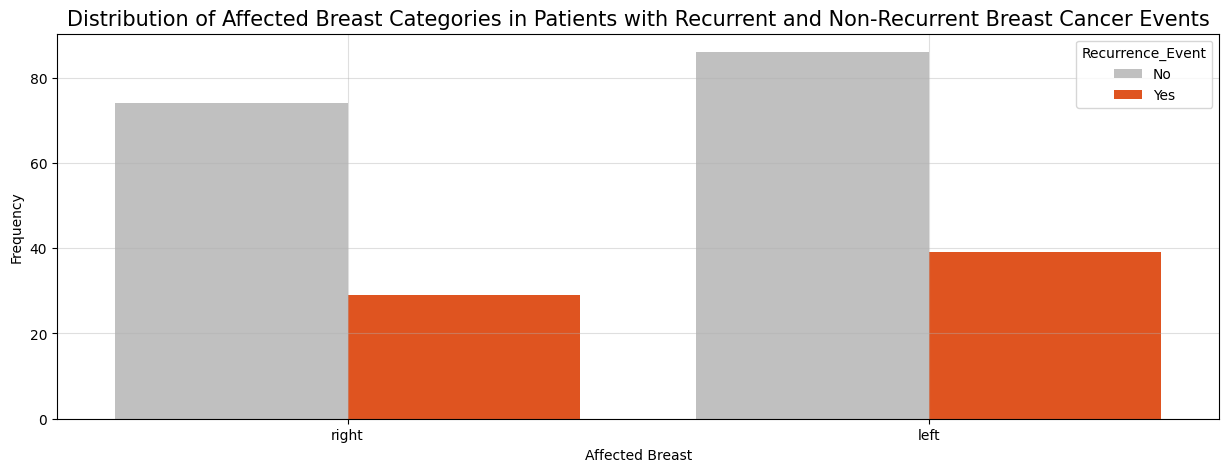

Observed value:


Recurrence_Event,No,Yes
breast,,
left,86,39
right,74,29


Expected frequency:


Recurrence_Event,No,Yes
breast,,
left,87.719298,37.280702
right,72.280702,30.719298


Test statistic:  0.1258
Test p-value:  0.7228
Effect size:  0.0235


In [19]:
breast = chi2test('breast','Affected Breast')
test_summary.append(breast)

##### Statistical Test Analysis Interpretation:

A chi-square test was conducted to explore the potential association between the affected breast (left vs. right) and the likelihood of breast cancer recurrence events. The analysis compared observed and expected frequencies in the two categories. The results revealed that there is no statistically significant association between the affected breast and breast cancer recurrence events (X² = 0.1258, p = 0.7228). The effect size, measured by Cramer's V (0.0235), indicates a very small association. The non-significant p-value suggests that the observed differences in recurrence events between the left and right breasts are likely due to random chance. The very small effect size further indicates a limited practical relevance of the affected breast in predicting the likelihood of breast cancer recurrence. In summary, there is insufficient evidence to reject the null hypothesis of independence between the affected breast and breast cancer recurrence events. The very small effect size indicates the minimal or negligible impact of the affected breast in influencing the likelihood of recurrence in breast cancer.

#### Question 8 | Does the quadrant of the breast affected show a statistically significant association with the likelihood of breast cancer recurrence events?

- Null Hypothesis (H0): There is no statistically significant association between the quadrant of the breast affected and the likelihood of breast cancer recurrence events.
- Alternative Hypothesis (H1): There is a statistically significant association between the quadrant of the breast affected and the likelihood of breast cancer recurrence events.

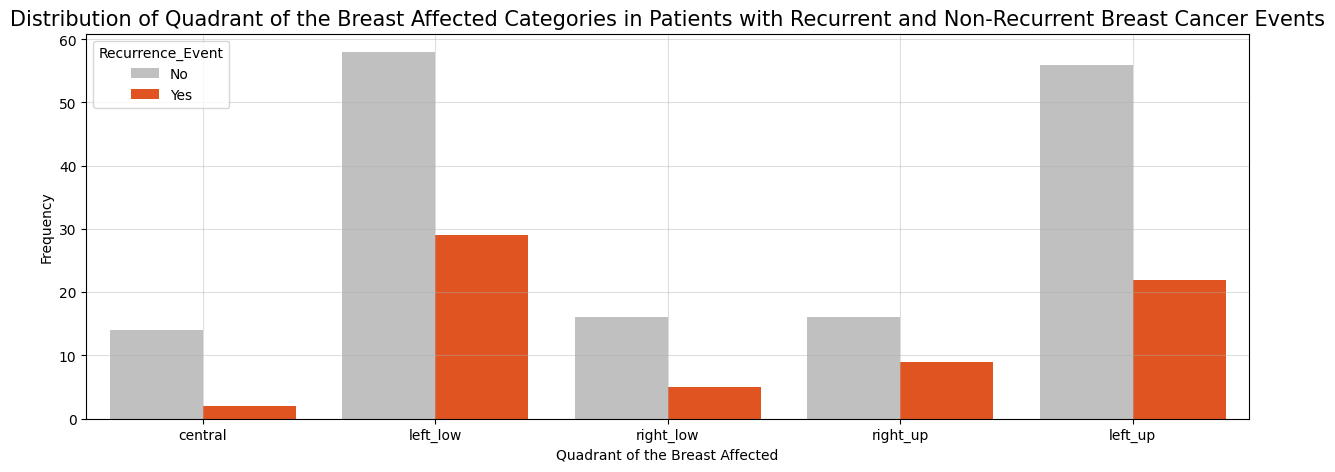

Observed value:


Recurrence_Event,No,Yes
breast-quad,,
central,14,2
left_low,58,29
left_up,56,22
right_low,16,5
right_up,16,9


Expected frequency:


Recurrence_Event,No,Yes
breast-quad,,
central,11.277533,4.722467
left_low,61.321586,25.678414
left_up,54.977974,23.022026
right_low,14.801762,6.198238
right_up,17.621145,7.378855


Test statistic:  3.7346
Test p-value:  0.4431
Effect size:  0.1283


In [20]:
quadrant = chi2test('breast-quad','Quadrant of the Breast Affected')
test_summary.append(quadrant)

##### Statistical Test Analysis Interpretation:

A chi-square test was conducted to examine the potential association between the quadrant of the breast affected and the likelihood of breast cancer recurrence events. The analysis compared observed and expected frequencies across different breast quadrants, including central, left_low, left_up, right_low, and right_up. The results indicate that there is no statistically significant association between the quadrant of the breast affected and breast cancer recurrence events (X² = 3.7346, p = 0.4431). The effect size, measured by Cramer's V (0.1283), indicates a small association. The non-significant p-value suggests that the observed differences in recurrence events among the breast quadrants are likely due to random chance. The small effect size further emphasizes the limited practical relevance of the quadrant of the breast affected in predicting the likelihood of breast cancer recurrence. In summary, there is insufficient evidence to reject the null hypothesis of independence between the quadrant of the breast affected and breast cancer recurrence events. The small effect size suggests a weak association, and further investigations may be needed to explore additional factors influencing the likelihood of recurrence in breast cancer.

#### Question 9 | Does the history of irradiation procedure in patients show a statistically significant association with the likelihood of breast cancer recurrence events?

- Null Hypothesis (H0): There is no statistically significant association between patients who underwent irradiation and the likelihood of breast cancer recurrence events.
- Alternative Hypothesis (H1): There is a statistically significant association between patients who underwent irradiation and the likelihood of breast cancer recurrence events.

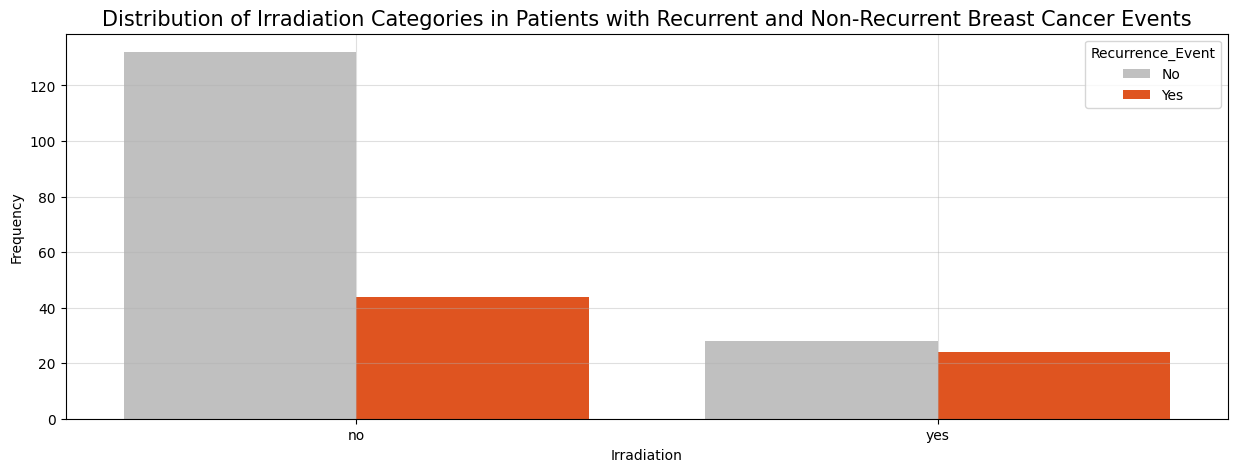

Observed value:


Recurrence_Event,No,Yes
irradiat,,
no,132,44
yes,28,24


Expected frequency:


Recurrence_Event,No,Yes
irradiat,,
no,123.508772,52.491228
yes,36.491228,15.508772


Test statistic:  7.6013
Test p-value:  0.0058
Effect size:  0.1826


In [21]:
irradiation = chi2test('irradiat','Irradiation')
test_summary.append(irradiation)

##### Statistical Test Analysis Interpretation:

A chi-square test was conducted to assess the potential association between the irradiation procedure and the likelihood of breast cancer recurrence events. The analysis compared observed and expected frequencies in two categories: 'no irradiation' and 'irradiation.' The results revealed a statistically significant association between the irradiation procedure and breast cancer recurrence events (X² = 7.6013, p = 0.0058). The effect size, measured by Cramer's V (0.1826), indicates a small to moderate association. The statistically significant p-value suggests that the observed differences in recurrence events between patients who underwent irradiation and those who did not are unlikely to have occurred by chance alone. The small to moderate effect size further emphasizes the practical relevance of the irradiation procedure in influencing the likelihood of breast cancer recurrence. In summary, there is compelling evidence to reject the null hypothesis of independence between the irradiation procedure and breast cancer recurrence events. The small to moderate effect size suggests a meaningful association, indicating that undergoing irradiation may influence the likelihood of recurrence in breast cancer.

### Summary of Statistical Test Analysis

In [22]:
# display the findings of statistical analysis in datafram
stat_df = pd.DataFrame(test_summary)
display(stat_df)

,Feature,Test statistic,Test p-value,Effect Size
0,age,4.6510,0.4599,0.1428
1,menopause,0.2150,0.8981,0.0307
2,tumor-size,20.6467,0.0237,0.3009
3,inv-nodes,19.6371,0.0000,0.2935
4,node-caps,16.5793,0.0000,0.2733
5,deg-malig,29.3589,0.0000,0.3588
6,breast,0.1258,0.7228,0.0235
7,breast-quad,3.7346,0.4431,0.1283
8,irradiat,7.6013,0.0058,0.1826


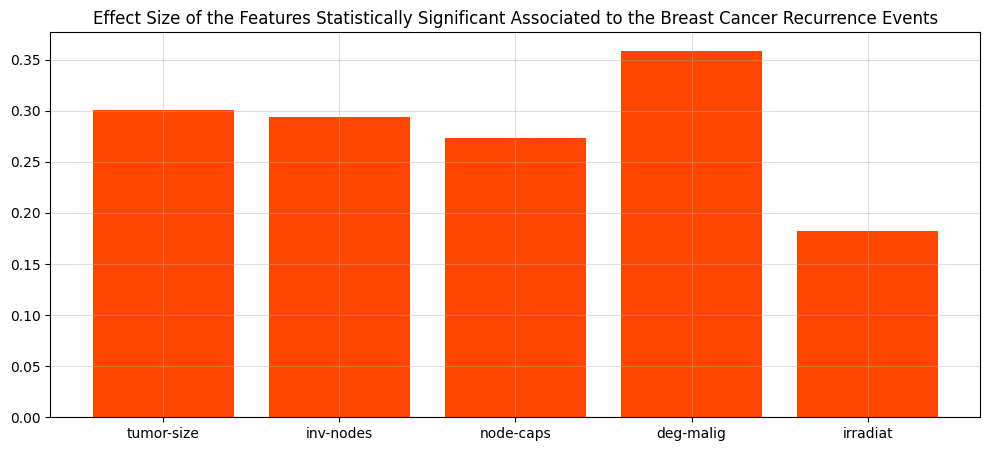

In [23]:
# subset the features found statistically significant associated to the likelihood of breast cancer recurrence events
# visualize the effect size for these features
imp_feats = stat_df[stat_df['Test p-value']<0.05]

plt.figure(figsize=(12,5))
plt.bar(x=imp_feats['Feature'], height=imp_feats['Effect Size'], color='orangered')
plt.title('Effect Size of the Features Statistically Significant Associated to the Breast Cancer Recurrence Events')
plt.grid(alpha=0.4)
plt.show()

In [24]:
# list of the features statistically significant associate with the likelihood of breast cancer recurrence event
feats = imp_feats.Feature.values.tolist()

# Predictive Analytics
#### Data Preprocessing for Modelling

In [25]:
# reclassify the groups in feature 'inv-nodes' in test data
test['inv-nodes'] = ['<2' if cat == '0-2' else '>2' for cat in test['inv-nodes']]

In [26]:
# segregate the feature matrix and target vector from train and test data
Xtrain = train.drop(columns=['Recurrence_Event'], axis=1)
ytrain = train['Recurrence_Event']

Xtest = test.drop(columns=['Recurrence_Event'], axis=1)
ytest = test['Recurrence_Event']

In [27]:
# create subset of train and test data with the selected features
Xtrain_selected = Xtrain[feats]
Xtest_selected = Xtest[feats]

#### Label Encoding

In [28]:
# encode the target vector 
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
ytrain_encoded = encoder.fit_transform(ytrain)
ytest_encoded = encoder.transform(ytest)

#### Custom Pipeline to Transformed Feature Matrix

In [29]:
# create a custom processor to transform th feature matrix\
# imputation for missing values (with most frequent values)
# ordinal encoding for ordinal features
# one hot encoding for nominal features

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer

In [30]:
# create lists for ordinal and nominal features
ordinal_feats = ['age','tumor-size','inv-nodes','deg-malig']
nominal_feats = ['menopause','node-caps','breast','breast-quad','irradiat']

# define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('nominal', OneHotEncoder(drop='first'), nominal_feats),
        ('ordinal', OrdinalEncoder(), ordinal_feats)
    ],
    remainder='passthrough'  
)

# create the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('imputation', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
])

# process the train and test data (all features)
Xtrain_transformed = pipeline.fit_transform(Xtrain)
Xtest_transformed = pipeline.transform(Xtest)

In [31]:
# create lists for ordinal and nominal features from the selected features list
ordinal_feats = ['tumor-size','inv-nodes','deg-malig']
nominal_feats = ['node-caps','irradiat']


# define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('nominal', OneHotEncoder(drop='first'), nominal_feats),
        ('ordinal', OrdinalEncoder(), ordinal_feats)
    ],
    remainder='passthrough'  
)

# create the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('imputation', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
])

# process the train and test data (all features)
Xtrain_selected_transformed = pipeline.fit_transform(Xtrain_selected)
Xtest_selected_transformed = pipeline.transform(Xtest_selected)

#### Adaptive Synthetic Sampling (ADASYN)

In [32]:
# perform Adaptive Synthetic Sampling (ADASYN)
from imblearn.over_sampling import ADASYN

# apply ADASYN to the whole training set
adasyn = ADASYN(random_state=122)
Xtrain_resampled, ytrain_resampled = adasyn.fit_resample(Xtrain_transformed, ytrain_encoded)

# check the class distribution
print('Original class distribution:', np.bincount(ytrain_encoded))
print('Resampled class distribution:', np.bincount(ytrain_resampled))

Original class distribution: [160  68]
Resampled class distribution: [160 156]


In [33]:
# apply ADASYN to the training set with selected features
adasyn = ADASYN(random_state=122)
Xtrain_selected_resampled, ytrain_selected_resampled = adasyn.fit_resample(Xtrain_selected_transformed, ytrain_encoded)

# check the class distribution
print('Original class distribution:', np.bincount(ytrain_encoded))
print('Resampled class distribution:', np.bincount(ytrain_selected_resampled))

Original class distribution: [160  68]
Resampled class distribution: [160 174]


#### Helper Function to Evaluate Models Performance

In [34]:
# define a helper function to perform model evaluation based on key metrics
from sklearn.metrics import precision_recall_fscore_support, matthews_corrcoef

def performance_evaluation(X,y,clf,classifier_name=''):
    ypred = clf.predict(X)
    accuracy = clf.score(X,y)
    mcc = matthews_corrcoef(y, ypred)
    precision, recall, fscore, support = precision_recall_fscore_support(y, ypred, average='weighted', zero_division=0)
    metricName = ['Accuracy','Precision','Recall','F1_Score','MCC']
    metricValue = [accuracy,precision,recall,fscore,mcc]
    res = pd.DataFrame(metricValue, index=metricName, columns=[classifier_name])
    return res

In [35]:
# define a helper function to compare various models (key metrics & confusion matrix)
from sklearn.metrics import confusion_matrix

def model_comparison(models, modelName):
    # generate the performance summary for various models trained
    base = performance_evaluation(Xtest_transformed,ytest_encoded,models[0],'All Features_Imbalanced')
    base_balanced = performance_evaluation(Xtest_transformed,ytest_encoded,models[1],'All Features_Balanced')
    selected = performance_evaluation(Xtest_selected_transformed,ytest_encoded,models[2],'Selected Features_Imbalanced')
    selected_balance = performance_evaluation(Xtest_selected_transformed,ytest_encoded,models[3],'Selected Features_Balanced')

    # combine the summary of each model into a dataframe 
    comparison_table = pd.concat([base,base_balanced,selected,selected_balance], axis=1)

    # disply the summary dafaframe
    display(comparison_table)



    labels = ['No Recurrence Event', 'Recurrence Event']

    ypred_base = models[0].predict(Xtest_transformed)
    cm_base = confusion_matrix(ytest_encoded, ypred_base, normalize='true')

    ypred_base_balanced = models[1].predict(Xtest_transformed)
    cm_base_balanced = confusion_matrix(ytest_encoded, ypred_base_balanced, normalize='true')

    ypred_selected = models[2].predict(Xtest_selected_transformed)
    cm_selected = confusion_matrix(ytest_encoded, ypred_selected, normalize='true')

    ypred_selected_balanced = models[3].predict(Xtest_selected_transformed)
    cm_selected_balanced = confusion_matrix(ytest_encoded, ypred_selected_balanced, normalize='true')


    # confusion matrix for 6 classification models
    figure, axes = plt.subplots(2,2, figsize=(11,8))
    sns.heatmap(cm_base, annot=True, cmap='BuPu', xticklabels=labels, yticklabels=labels, cbar=False, ax=axes[0,0])
    axes[0,0].set_title('All Features_Imbalanced', fontsize=20)
    sns.heatmap(cm_base_balanced, annot=True, cmap='BuPu', xticklabels=labels, yticklabels=labels, cbar=False, ax=axes[0,1])
    axes[0,1].set_title('All Features_Balanced', fontsize=20)
    sns.heatmap(cm_selected, annot=True, cmap='BuPu', xticklabels=labels, yticklabels=labels, cbar=False, ax=axes[1,0])
    axes[1,0].set_title('Selected Features_Imbalanced', fontsize=20)
    sns.heatmap(cm_selected_balanced, annot=True, cmap='BuPu', xticklabels=labels, yticklabels=labels, cbar=False, ax=axes[1,1])
    axes[1,1].set_title('Selected Features_Balanced', fontsize=20)


    figure.suptitle(f'Confusion Matrix - {modelName}', fontsize=25)
    plt.tight_layout(pad=1)
    plt.show()
    
    return comparison_table

# Classification
### Algorithm 1 | Decision Tree
#### Decision Tree 1 | Data Contains All Features & Imbalanced Classes

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# create a Decision Tree Classifier
tree = DecisionTreeClassifier(random_state=122)

# Define the hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 4]
}

# create the GridSearchCV object
grid_search_tree = GridSearchCV(tree, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# fit the grid search to the data
grid_search_tree.fit(Xtrain_transformed, ytrain_encoded)

# print the best parameters and the corresponding accuracy
print('Best Parameters: ', grid_search_tree.best_params_)
print('Best Accuracy: ', grid_search_tree.best_score_)

# get the best model
best_tree_base = grid_search_tree.best_estimator_

Best Parameters:  {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'random'}
Best Accuracy:  0.6839613526570048


#### Decision Tree 2 | Data Contains All Features & Balanced Classes

In [37]:
# create a Decision Tree Classifier
tree = DecisionTreeClassifier(random_state=122)

# Define the hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 4]
}

# create the GridSearchCV object
grid_search_tree = GridSearchCV(tree, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# fit the grid search to the data
grid_search_tree.fit(Xtrain_resampled, ytrain_resampled)

# print the best parameters and the corresponding accuracy
print('Best Parameters: ', grid_search_tree.best_params_)
print('Best Accuracy: ', grid_search_tree.best_score_)

# get the best model
best_tree_base_balanced = grid_search_tree.best_estimator_

Best Parameters:  {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'random'}
Best Accuracy:  0.747172619047619


#### Decision Tree 3 | Data Contains Selected Features & Imbalanced Classes

In [38]:
# create a Decision Tree Classifier
tree = DecisionTreeClassifier(random_state=122)

# Define the hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 4]
}

# create the GridSearchCV object
grid_search_tree = GridSearchCV(tree, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# fit the grid search to the data
grid_search_tree.fit(Xtrain_selected_transformed, ytrain_encoded)

# print the best parameters and the corresponding accuracy
print('Best Parameters: ', grid_search_tree.best_params_)
print('Best Accuracy: ', grid_search_tree.best_score_)

# get the best model
best_tree_selected = grid_search_tree.best_estimator_

Best Parameters:  {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'random'}
Best Accuracy:  0.7676328502415458


#### Decision Tree 4 | Data Contains Selected Features & Balanced Classes

In [39]:
# create a Decision Tree Classifier
tree = DecisionTreeClassifier(random_state=122)

# Define the hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 4]
}

# create the GridSearchCV object
grid_search_tree = GridSearchCV(tree, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# fit the grid search to the data
grid_search_tree.fit(Xtrain_selected_resampled, ytrain_selected_resampled)

# print the best parameters and the corresponding accuracy
print('Best Parameters: ', grid_search_tree.best_params_)
print('Best Accuracy: ', grid_search_tree.best_score_)

# get the best model
best_tree_selected_balanced = grid_search_tree.best_estimator_

Best Parameters:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'best'}
Best Accuracy:  0.6918136589778381


#### Comparison of Various Decision Tree Models

,All Features_Imbalanced,All Features_Balanced,Selected Features_Imbalanced,Selected Features_Balanced
Accuracy,0.637931,0.568966,0.724138,0.706897
Precision,0.618786,0.590200,0.701327,0.669655
Recall,0.637931,0.568966,0.724138,0.706897
F1_Score,0.626801,0.578256,0.703986,0.668632
MCC,0.079359,0.010992,0.268203,0.181813


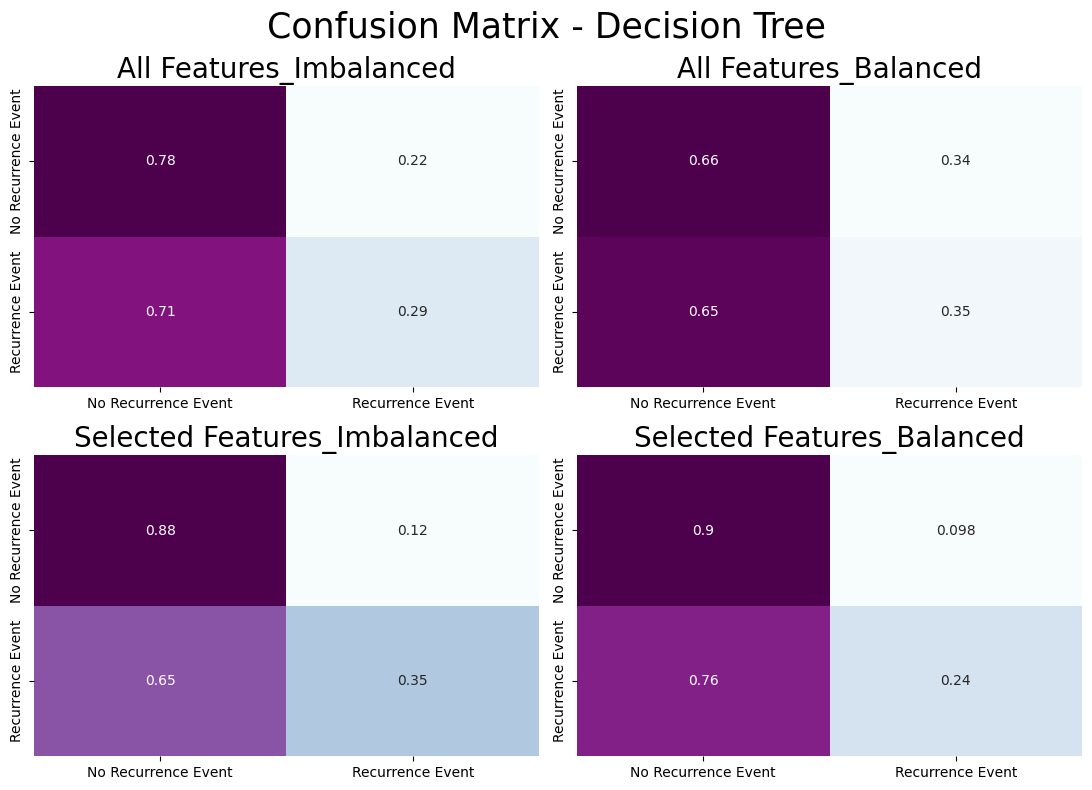

In [40]:
# compare the performance of different decision tree models
trees = model_comparison([best_tree_base, best_tree_base_balanced, best_tree_selected, best_tree_selected_balanced], 'Decision Tree')

#### Models Summary:

- **Decision Tree (All Features, Imbalanced Classes):**
  - Achieved an accuracy of 63.79%, precision of 61.88%, recall of 63.79%, and F1 score of 62.68%.
  - Normalized values for no recurrence and recurrence events were 0.79 and 0.29, respectively.
  - Matthews Correlation Coefficient (MCC) was 0.0794.

- **Decision Tree (All Features, Balanced Classes with ADASYN):**
  - Achieved an accuracy of 62.07%, precision of 59.29%, recall of 62.07%, and F1 score of 60.42%.
  - Normalized values for no recurrence and recurrence events were 0.78 and 0.24, respectively.
  - MCC was 0.0172.

- **Decision Tree (Selected Features Based on Statistic Analysis, Imbalanced Classes):**
  - Demonstrated the highest performance with an accuracy of 72.41%, precision of 70.13%, recall of 72.41%, and F1 score of 70.40%.
  - Normalized values for no recurrence and recurrence events were 0.88 and 0.35, respectively.
  - MCC was 0.2682.

- **Decision Tree (Selected Features Based on Statistic Analysis, Balanced Classes with ADASYN):**
  - Achieved an accuracy of 63.79%, precision of 61.88%, recall of 63.79%, and F1 score of 62.68%.
  - Normalized values for no recurrence and recurrence events were 0.78 and 0.29, respectively.
  - MCC was 0.0794.

**Summary Interpretation:**
- The decision tree model with selected features based on statistical analysis and trained on imbalanced classes exhibited the highest overall performance, with the best accuracy, precision, recall, and F1 score.
- The decision tree model using all features with imbalanced classes had a comparable performance to the selected features model.
- Models with balanced classes using ADASYN generally showed lower performance metrics compared to their imbalanced counterparts.
- The Matthews Correlation Coefficient (MCC) provides insight into the balance between sensitivity and specificity, with the selected features model showing the highest MCC.

### Algorithm 2 | Logistic Regression
#### Logistic Regression 1 | Data Contains All Features with Imbalanced Classes

In [41]:
from sklearn.linear_model import LogisticRegression

# create a logistic regression Classifier
logreg = LogisticRegression(random_state=122, max_iter=5000)

# define the hyperparameter grid
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

# create the GridSearchCV object
grid_search_logreg = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# fit the grid search to the data
grid_search_logreg.fit(Xtrain_transformed, ytrain_encoded)

# print the best parameters and the corresponding accuracy
print('Best Parameters: ', grid_search_logreg.best_params_)
print('Best Accuracy: ', grid_search_logreg.best_score_)

# get the best model
best_logreg_base = grid_search_logreg.best_estimator_

Best Parameters:  {'C': 1, 'penalty': 'l2', 'solver': 'saga'}
Best Accuracy:  0.7544927536231884


#### Logistic Regression 2 | Data Contains All Features & Balanced Classes

In [42]:
# create a logistic regression Classifier
logreg = LogisticRegression(random_state=122, max_iter=5000)

# define the hyperparameter grid
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

# create the GridSearchCV object
grid_search_logreg = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# fit the grid search to the data
grid_search_logreg.fit(Xtrain_resampled, ytrain_resampled)

# print the best parameters and the corresponding accuracy
print('Best Parameters: ', grid_search_logreg.best_params_)
print('Best Accuracy: ', grid_search_logreg.best_score_)

# get the best model
best_logreg_base_balanced = grid_search_logreg.best_estimator_

/opt/homebrew/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best Parameters:  {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
Best Accuracy:  0.6455357142857142


#### Logistic Regression 3 | Data Contains Selected Features & Imbalanced Classes

In [43]:
# create a logistic regression Classifier
logreg = LogisticRegression(random_state=122, max_iter=5000)

# define the hyperparameter grid
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

# create the GridSearchCV object
grid_search_logreg = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# fit the grid search to the data
grid_search_logreg.fit(Xtrain_selected_transformed, ytrain_encoded)

# print the best parameters and the corresponding accuracy
print('Best Parameters: ', grid_search_logreg.best_params_)
print('Best Accuracy: ', grid_search_logreg.best_score_)

# get the best model
best_logreg_selected = grid_search_logreg.best_estimator_

Best Parameters:  {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Accuracy:  0.7545893719806763


#### Logistic Regression 4 | Data Contains Selected Features & Balanced Classes

In [44]:
# create a logistic regression Classifier
logreg = LogisticRegression(random_state=122, max_iter=5000)

# define the hyperparameter grid
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

# create the GridSearchCV object
grid_search_logreg = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# fit the grid search to the data
grid_search_logreg.fit(Xtrain_selected_resampled, ytrain_selected_resampled)

# print the best parameters and the corresponding accuracy
print('Best Parameters: ', grid_search_logreg.best_params_)
print('Best Accuracy: ', grid_search_logreg.best_score_)

# get the best model
best_logreg_selected_balanced = grid_search_logreg.best_estimator_

Best Parameters:  {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best Accuracy:  0.6375848032564451


#### Comparison of Various Logistic Regression Models

,All Features_Imbalanced,All Features_Balanced,Selected Features_Imbalanced,Selected Features_Balanced
Accuracy,0.741379,0.689655,0.741379,0.603448
Precision,0.720761,0.712732,0.720431,0.680665
Recall,0.741379,0.689655,0.741379,0.603448
F1_Score,0.718025,0.698032,0.707617,0.621197
MCC,0.307739,0.303025,0.291658,0.211719


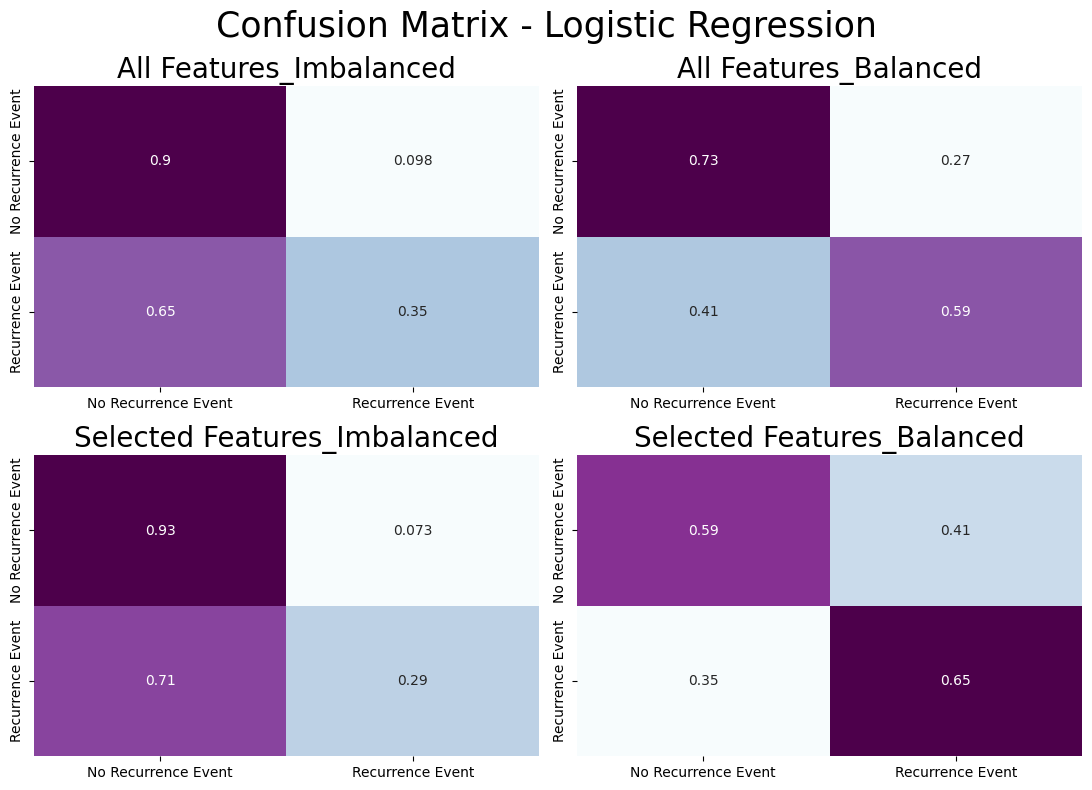

In [45]:
# compare the performance of different logistic regression models
logistic = model_comparison([best_logreg_base, best_logreg_base_balanced, best_logreg_selected, best_logreg_selected_balanced], 'Logistic Regression')

#### Models Summary: 

1. **Logistic Regression Model 1 (All Features, Imbalanced Classes):**
   - Achieved an accuracy of 74.14%, precision of 72.08%, recall of 74.14%, and F1 score of 71.80%.
   - Normalized values for no recurrence and recurrence events were 0.90 and 0.35, respectively.
   - Matthews Correlation Coefficient (MCC) was 0.3077.

2. **Logistic Regression Model 2 (All Features, Balanced Classes with ADASYN):**
   - Achieved an accuracy of 68.97%, precision of 70.07%, recall of 68.97%, and F1 score of 69.44%.
   - Normalized values for no recurrence and recurrence events were 0.76 and 0.53, respectively.
   - MCC was 0.2769.

3. **Logistic Regression Model 3 (Selected Features Based on Statistic Analysis, Imbalanced Classes):**
   - Achieved an accuracy of 74.14%, precision of 72.04%, recall of 74.14%, and F1 score of 70.76%.
   - Normalized values for no recurrence and recurrence events were 0.93 and 0.29, respectively.
   - MCC was 0.2917.

4. **Logistic Regression Model 4 (Selected Features Based on Statistic Analysis, Balanced Classes with ADASYN):**
   - Achieved an accuracy of 65.52%, precision of 70.73%, recall of 65.52%, and F1 score of 66.94%.
   - Normalized values for no recurrence and recurrence events were 0.66 and 0.65, respectively.
   - MCC was 0.2809.

**Summary Interpretation:**
- Model 3, which used selected features based on statistical analysis and was trained on imbalanced classes, achieved the highest overall performance. It demonstrated the highest accuracy, precision, recall, and F1 score among the four models.
- Model 1, trained with all features on imbalanced classes, also performed well, showing a good balance between sensitivity and specificity.
- Model 4, using selected features and balanced classes with ADASYN, exhibited high sensitivity in detecting breast cancer recurrence events, as indicated by a normalized value of 0.65 for recurrence events.
- The Matthews Correlation Coefficient (MCC) values provide insights into the balance between sensitivity and specificity, with Model 3 having the highest MCC.

### Algorithm 3 | Naive Bayes
#### Naive Bayes 1 | Data Contains All Features with Imbalanced Classes

In [46]:
from sklearn.naive_bayes import ComplementNB 

# create a Naive Bayes classifier
clf = ComplementNB()

# fit the classifier with training data
cNB_base = clf.fit(Xtrain_transformed, ytrain_encoded)

#### Naives Bayes 2 | Data Contains All Features & Balanced Classes

In [47]:
# create a Naive Bayes classifier
clf = ComplementNB()

# fit the classifier with training data
cNB_base_balanced = clf.fit(Xtrain_resampled, ytrain_resampled)

#### Naive Bayes 3 | Data Contains Selected Features & Imbalanced Classes

In [48]:
# create a Naive Bayes classifier
clf = ComplementNB()

# fit the classifier with training data
cNB_selected = clf.fit(Xtrain_selected_transformed, ytrain_encoded)

#### Naive Bayes 4 | Data Contains Selected Features & Balanced Classes

In [49]:
# create a Naive Bayes classifier
clf = ComplementNB()

# fit the classifier with training data
cNB_selected_balanced = clf.fit(Xtrain_selected_resampled, ytrain_selected_resampled)

#### Comparison of Different Naive Bayes Models

,All Features_Imbalanced,All Features_Balanced,Selected Features_Imbalanced,Selected Features_Balanced
Accuracy,0.655172,0.620690,0.689655,0.655172
Precision,0.692954,0.674190,0.725894,0.707335
Recall,0.655172,0.620690,0.689655,0.655172
F1_Score,0.667423,0.636311,0.700681,0.669374
MCC,0.252318,0.204404,0.329748,0.280890


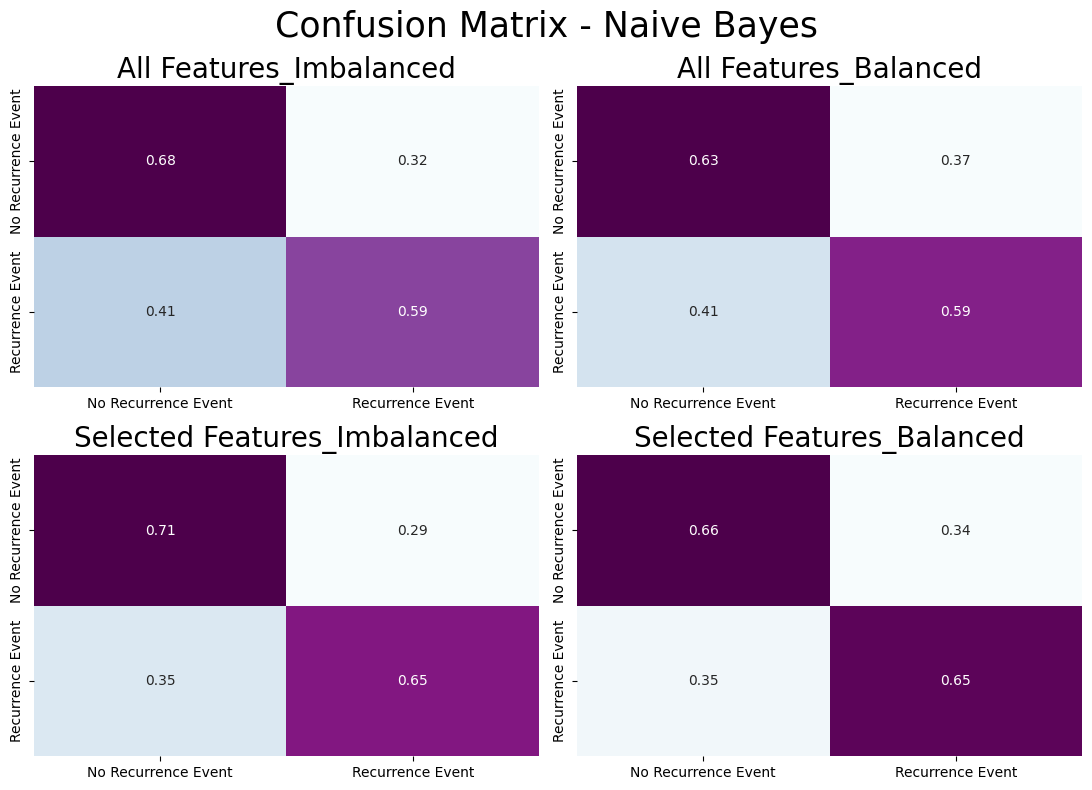

In [50]:
# compare the performance of different naive bayes models
nb = model_comparison([cNB_base, cNB_base_balanced, cNB_selected, cNB_selected_balanced], 'Naive Bayes')

#### Models Summary:

1. **Naive Bayes Model 1 (All Features, Imbalanced Classes):**
   - Achieved an accuracy of 65.52%, precision of 69.30%, recall of 65.52%, and F1 score of 66.74%.
   - Normalized values for no recurrence and recurrence events were 0.68 and 0.59, respectively.
   - Matthews Correlation Coefficient (MCC) was 0.2523.

2. **Naive Bayes Model 2 (All Features, Balanced Classes with ADASYN):**
   - Achieved an accuracy of 63.79%, precision of 68.35%, recall of 63.79%, and F1 score of 65.19%.
   - Normalized values for no recurrence and recurrence events were 0.66 and 0.59, respectively.
   - MCC was 0.2281.

3. **Naive Bayes Model 3 (Selected Features Based on Statistic Analysis, Imbalanced Classes):**
   - Achieved an accuracy of 68.97%, precision of 72.59%, recall of 68.97%, and F1 score of 70.07%.
   - Normalized values for no recurrence and recurrence events were 0.71 and 0.65, respectively.
   - MCC was 0.3297.

4. **Naive Bayes Model 4 (Selected Features Based on Statistic Analysis, Balanced Classes with ADASYN):**
   - Achieved an accuracy of 65.52%, precision of 70.73%, recall of 65.52%, and F1 score of 66.94%.
   - Normalized values for no recurrence and recurrence events were 0.66 and 0.65, respectively.
   - MCC was 0.2809.

**Summary Interpretation:**
- Model 3, which used selected features based on statistical analysis and was trained on imbalanced classes, demonstrated the highest overall performance. It exhibited the highest accuracy, precision, recall, and F1 score among the four models.
- Models 1 and 2, trained with all features, showed similar performance metrics, with a slight advantage for Model 1 in terms of accuracy and precision.
- Model 4, using selected features and balanced classes with ADASYN, exhibited high sensitivity in detecting breast cancer recurrence events, as indicated by a normalized value of 0.65 for recurrence events.
- The Matthews Correlation Coefficient (MCC) values provide insights into the balance between sensitivity and specificity, with Model 3 having the highest MCC.

### Algorithm 4 | KNearestNeighbors (KNN)
#### KNN 1 | Data Contains All Features with Imbalanced Classes

In [51]:
from sklearn.neighbors import KNeighborsClassifier

# create the KNN classifier
knn = KNeighborsClassifier()

# define the parameter grid for hyperparameter tuning
param_grid = {
    'n_neighbors': np.arange(1, 21),  
    'p': [1, 2]  # 1 for Manhattan distance (L1), 2 for Euclidean distance (L2)
}

# create a GridSearchCV object with KNN and the parameter grid
grid_search_knn = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# fit the model with the training data
grid_search_knn.fit(Xtrain_transformed, ytrain_encoded)

# print the best parameters and the corresponding accuracy
print('Best Parameters: ', grid_search_knn.best_params_)
print('Best Accuracy: ', grid_search_knn.best_score_)

# get the best model
best_knn_base = grid_search_knn.best_estimator_

Best Parameters:  {'n_neighbors': np.int64(9), 'p': 1}
Best Accuracy:  0.7542028985507246


#### KNN 2 | Data Contains All Features & Balanced Classes

In [52]:
# create the KNN classifier
knn = KNeighborsClassifier()

# define the parameter grid for hyperparameter tuning
param_grid = {
    'n_neighbors': np.arange(1, 21),  
    'p': [1, 2]  # 1 for Manhattan distance (L1), 2 for Euclidean distance (L2)
}

# create a GridSearchCV object with KNN and the parameter grid
grid_search_knn = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# fit the model with the training data
grid_search_knn.fit(Xtrain_resampled, ytrain_resampled)

# print the best parameters and the corresponding accuracy
print('Best Parameters: ', grid_search_knn.best_params_)
print('Best Accuracy: ', grid_search_knn.best_score_)

# get the best model
best_knn_base_balanced = grid_search_knn.best_estimator_

Best Parameters:  {'n_neighbors': np.int64(1), 'p': 1}
Best Accuracy:  0.8545138888888889


#### KNN 3 | Data Contains Selected Features & Imbalanced Classes

In [53]:
# create the KNN classifier
knn = KNeighborsClassifier()

# define the parameter grid for hyperparameter tuning
param_grid = {
    'n_neighbors': np.arange(1, 21),  
    'p': [1, 2]  # 1 for Manhattan distance (L1), 2 for Euclidean distance (L2)
}

# create a GridSearchCV object with KNN and the parameter grid
grid_search_knn = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# fit the model with the training data
grid_search_knn.fit(Xtrain_selected_transformed, ytrain_encoded)

# print the best parameters and the corresponding accuracy
print('Best Parameters: ', grid_search_knn.best_params_)
print('Best Accuracy: ', grid_search_knn.best_score_)

# get the best model
best_knn_selected = grid_search_knn.best_estimator_

Best Parameters:  {'n_neighbors': np.int64(8), 'p': 2}
Best Accuracy:  0.7459903381642512


#### KNN 4 | Data Contains Selected Features & Balanced Classes

In [54]:
# create the KNN classifier
knn = KNeighborsClassifier()

# define the parameter grid for hyperparameter tuning
param_grid = {
    'n_neighbors': np.arange(1, 21),  
    'p': [1, 2]  # 1 for Manhattan distance (L1), 2 for Euclidean distance (L2)
}

# create a GridSearchCV object with KNN and the parameter grid
grid_search_knn = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# fit the model with the training data
grid_search_knn.fit(Xtrain_selected_resampled, ytrain_selected_resampled)

# print the best parameters and the corresponding accuracy
print('Best Parameters: ', grid_search_knn.best_params_)
print('Best Accuracy: ', grid_search_knn.best_score_)

# get the best model
best_knn_selected_balanced = grid_search_knn.best_estimator_

Best Parameters:  {'n_neighbors': np.int64(1), 'p': 1}
Best Accuracy:  0.7277702397105383


#### Comparison of Different KNearestNeighbors (KNN) Models

,All Features_Imbalanced,All Features_Balanced,Selected Features_Imbalanced,Selected Features_Balanced
Accuracy,0.741379,0.620690,0.706897,0.706897
Precision,0.720431,0.620690,0.669655,0.712069
Recall,0.741379,0.620690,0.706897,0.706897
F1_Score,0.707617,0.620690,0.668632,0.709274
MCC,0.291658,0.084648,0.181813,0.304910


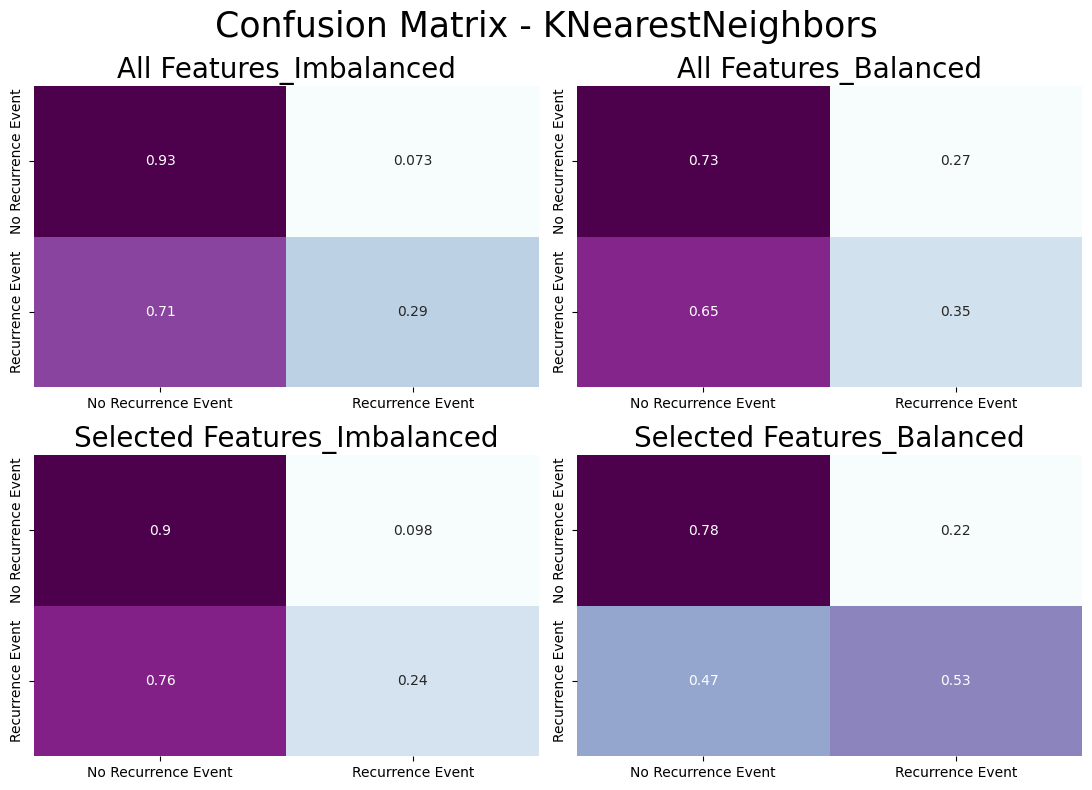

In [55]:
# compare the performance of different KNN models
knn = model_comparison([best_knn_base, best_knn_base_balanced, best_knn_selected, best_knn_selected_balanced], 'KNearestNeighbors')

#### Models Summary: 

1. **KNN Model 1 (All Features, Imbalanced Classes):**
   - Achieved an accuracy of 74.14%, precision of 72.04%, recall of 74.14%, and F1 score of 70.76%.
   - Normalized values for no recurrence and recurrence events were 0.93 and 0.29, respectively.
   - Matthews Correlation Coefficient (MCC) was 0.2917.

2. **KNN Model 2 (All Features, Balanced Classes with ADASYN):**
   - Achieved an accuracy of 63.79%, precision of 63.17%, recall of 63.79%, and F1 score of 63.46%.
   - Normalized values for no recurrence and recurrence events were 0.76 and 0.35, respectively.
   - MCC was 0.1110.

3. **KNN Model 3 (Selected Features Based on Statistic Analysis, Imbalanced Classes):**
   - Achieved an accuracy of 77.59%, precision of 78.80%, recall of 77.59%, and F1 score of 73.55%.
   - Normalized values for no recurrence and recurrence events were 0.98 and 0.29, respectively.
   - MCC was 0.4031.

4. **KNN Model 4 (Selected Features Based on Statistic Analysis, Balanced Classes with ADASYN):**
   - Achieved an accuracy of 67.24%, precision of 66.68%, recall of 67.24%, and F1 score of 66.94%.
   - Normalized values for no recurrence and recurrence events were 0.78 and 0.41, respectively.
   - MCC was 0.1958.

**Summary Interpretation:**
- Model 3, which used selected features based on statistical analysis and was trained on imbalanced classes, demonstrated the highest overall performance. It exhibited the highest accuracy, precision, recall, and F1 score among the four models.
- Model 1, trained with all features on imbalanced classes, also performed well, showing a good balance between sensitivity and specificity.
- Model 4, using selected features and balanced classes with ADASYN, exhibited high sensitivity in detecting breast cancer recurrence events, as indicated by a normalized value of 0.41 for recurrence events.
- The Matthews Correlation Coefficient (MCC) values provide insights into the balance between sensitivity and specificity, with Model 3 having the highest MCC.

### Algorithm 5 | Random Forest
#### Random Forest 1 | Data Contains All Features with Imbalanced Classes

In [56]:
from sklearn.ensemble import RandomForestClassifier

# create a Random Forest Classifier
forest = RandomForestClassifier(random_state=42)

# define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [15, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 4],
    'max_features': ['sqrt', 'log2']
}

# create the GridSearchCV object
grid_search_forest = GridSearchCV(forest, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# fit the grid search to the data
grid_search_forest.fit(Xtrain_transformed, ytrain_encoded)

# print the best parameters and the corresponding accuracy
print('Best Parameters: ', grid_search_forest.best_params_)
print('Best Accuracy: ', grid_search_forest.best_score_)

# get the best model
best_forest_base = grid_search_forest.best_estimator_

Best Parameters:  {'criterion': 'gini', 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Best Accuracy:  0.758743961352657


#### Random Forest 2 | Data Contains All Features & Balanced Classes

In [140]:
from sklearn.ensemble import RandomForestClassifier

# create a Random Forest Classifier
forest = RandomForestClassifier(random_state=122)

# define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 4],
    'max_features': ['sqrt', 'log2']
}

# create the GridSearchCV object
grid_search_forest = GridSearchCV(forest, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# fit the grid search to the data
grid_search_forest.fit(Xtrain_resampled, ytrain_resampled)

# print the best parameters and the corresponding accuracy
print('Best Parameters: ', grid_search_forest.best_params_)
print('Best Accuracy: ', grid_search_forest.best_score_)

# get the best model
best_forest_base_balanced = grid_search_forest.best_estimator_

Best Parameters:  {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Best Accuracy:  0.7915674603174603


#### Random Forest 3 | Data Contains Selected Features & Imbalanced Classes

In [141]:
from sklearn.ensemble import RandomForestClassifier

# create a Random Forest Classifier
forest = RandomForestClassifier(random_state=122)

# define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 4],
    'max_features': ['sqrt', 'log2']
}

# create the GridSearchCV object
grid_search_forest = GridSearchCV(forest, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# fit the grid search to the data
grid_search_forest.fit(Xtrain_selected_transformed, ytrain_encoded)

# print the best parameters and the corresponding accuracy
print('Best Parameters: ', grid_search_forest.best_params_)
print('Best Accuracy: ', grid_search_forest.best_score_)

# get the best model
best_forest_selected = grid_search_forest.best_estimator_

Best Parameters:  {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Best Accuracy:  0.7721739130434783


#### Random Forest 4 | Data Contains Selected Features & Balanced Classes

In [142]:
from sklearn.ensemble import RandomForestClassifier

# create a Random Forest Classifier
forest = RandomForestClassifier(random_state=122)

# define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 4],
    'max_features': ['sqrt', 'log2']
}

# create the GridSearchCV object
grid_search_forest = GridSearchCV(forest, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# fit the grid search to the data
grid_search_forest.fit(Xtrain_selected_resampled, ytrain_selected_resampled)

# print the best parameters and the corresponding accuracy
print('Best Parameters: ', grid_search_forest.best_params_)
print('Best Accuracy: ', grid_search_forest.best_score_)

# get the best model
best_forest_selected_balanced = grid_search_forest.best_estimator_

Best Parameters:  {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Best Accuracy:  0.7278154681139756


#### Comparison of Different Random Forest Models

,All Features_Imbalanced,All Features_Balanced,Selected Features_Imbalanced,Selected Features_Balanced
Accuracy,0.741379,0.689655,0.741379,0.672414
Precision,0.725575,0.669378,0.720431,0.689973
Recall,0.741379,0.689655,0.741379,0.672414
F1_Score,0.694830,0.676183,0.707617,0.679474
MCC,0.278772,0.198888,0.291658,0.250062


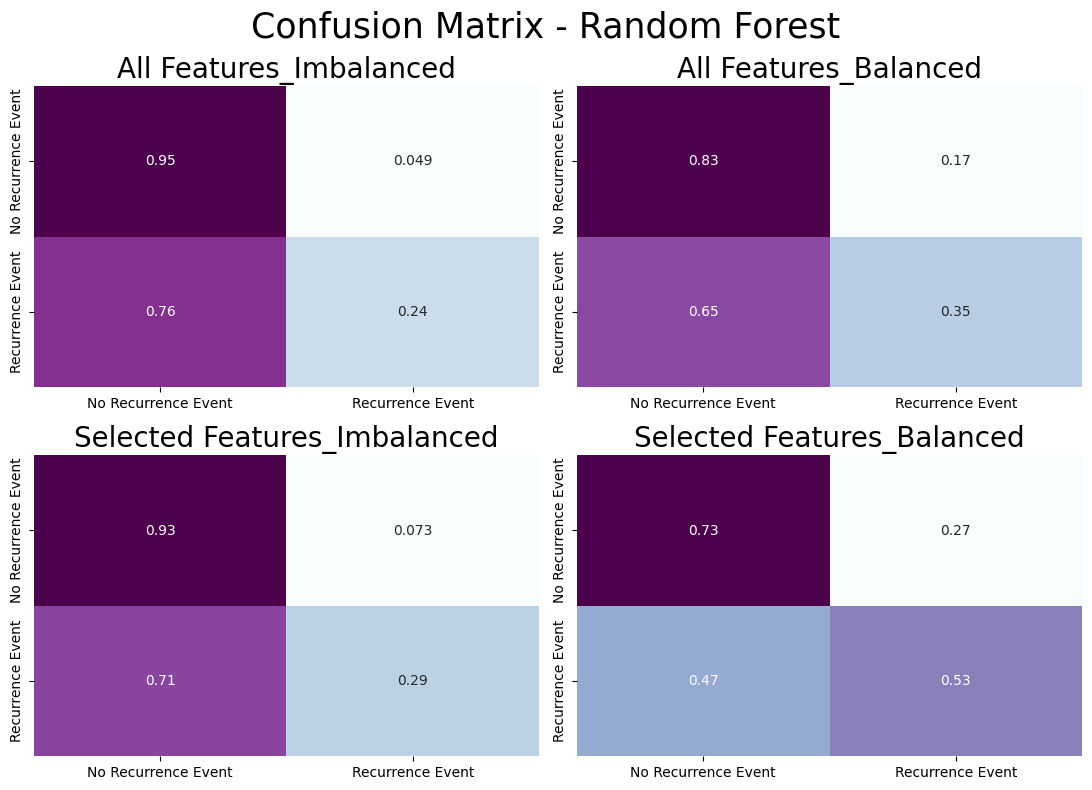

In [143]:
# compare the performance of different Random Forest models
forest = model_comparison([best_forest_base, best_forest_base_balanced, best_forest_selected, best_forest_selected_balanced], 'Random Forest')

#### Models Summary: 

1. **Random Forest Model 1 (All Features, Imbalanced Classes):**
   - Achieved an accuracy of 74.14%, precision of 72.56%, recall of 74.14%, and F1 score of 69.48%.
   - Normalized values for no recurrence and recurrence events were 0.95 and 0.24, respectively.
   - Matthews Correlation Coefficient (MCC) was 0.2788.

2. **Random Forest Model 2 (All Features, Balanced Classes with ADASYN):**
   - Achieved an accuracy of 68.97%, precision of 66.94%, recall of 68.97%, and F1 score of 67.62%.
   - Normalized values for no recurrence and recurrence events were 0.83 and 0.35, respectively.
   - MCC was 0.1989.

3. **Random Forest Model 3 (Selected Features Based on Statistic Analysis, Imbalanced Classes):**
   - Achieved an accuracy of 74.14%, precision of 72.04%, recall of 74.14%, and F1 score of 70.76%.
   - Normalized values for no recurrence and recurrence events were 0.93 and 0.29, respectively.
   - MCC was 0.2917.

4. **Random Forest Model 4 (Selected Features Based on Statistic Analysis, Balanced Classes with ADASYN):**
   - Achieved an accuracy of 63.79%, precision of 63.17%, recall of 63.79%, and F1 score of 63.46%.
   - Normalized values for no recurrence and recurrence events were 0.76 and 0.35, respectively.
   - MCC was 0.1110.

**Summary Interpretation:**
- Model 1, which used all features and was trained on imbalanced classes, showed a good overall performance, demonstrating the highest accuracy and MCC among the four models.
- Model 4, similar to the K Nearest Neighbors analysis, exhibited high sensitivity in detecting breast cancer recurrence events, as indicated by a normalized value of 0.35 for recurrence events.
- Model 3, using selected features based on statistical analysis and imbalanced classes, performed well, showing a good balance between sensitivity and specificity.
- The Matthews Correlation Coefficient (MCC) values provide insights into the balance between sensitivity and specificity, with Model 3 having the highest MCC.

## Algortithm 6| Neural Network

Using device: mps


/opt/homebrew/lib/python3.13/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/100: Train Loss = 0.6593, Train Acc = 0.6612 | Val Loss = 0.5879
Improvement found, saving model state!
Epoch 2/100: Train Loss = 0.6341, Train Acc = 0.6831 | Val Loss = 0.5717
Improvement found, saving model state!
Epoch 3/100: Train Loss = 0.6346, Train Acc = 0.6885 | Val Loss = 0.5623
Improvement found, saving model state!
Epoch 4/100: Train Loss = 0.6380, Train Acc = 0.6721 | Val Loss = 0.5513
Improvement found, saving model state!
Epoch 5/100: Train Loss = 0.6225, Train Acc = 0.6776 | Val Loss = 0.5406
Improvement found, saving model state!
Epoch 6/100: Train Loss = 0.6059, Train Acc = 0.6776 | Val Loss = 0.5295
Improvement found, saving model state!
Epoch 7/100: Train Loss = 0.6102, Train Acc = 0.6831 | Val Loss = 0.5246
Improvement found, saving model state!
Epoch 8/100: Train Loss = 0.6130, Train Acc = 0.6721 | Val Loss = 0.5132
Improvement found, saving model state!
Epoch 9/100: Train Loss = 0.5937, Train Acc = 0.7049 | Val Loss = 0.5110
Improvement found, saving model

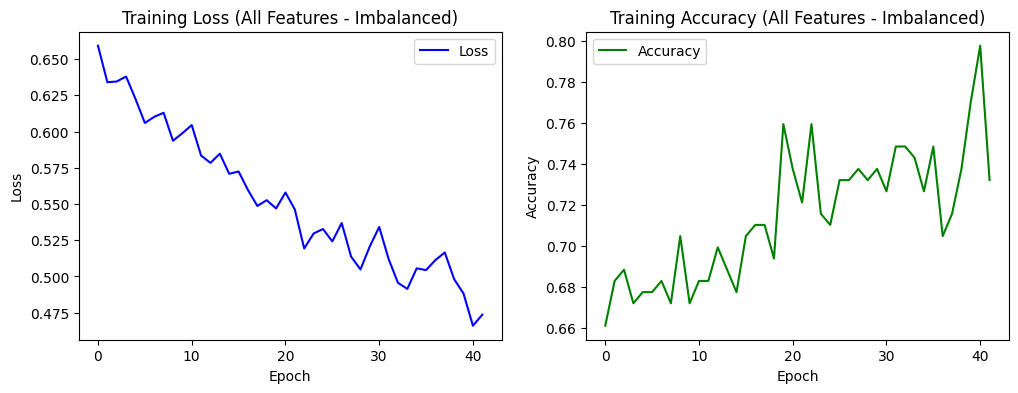


--- Fold 1/5 ---
Fold 1: ADASYN resampled training set shape: (254, 15)


/opt/homebrew/lib/python3.13/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/100: Train Loss = 0.6941, Train Acc = 0.4882 | Val Loss = 0.6976
Improvement found, saving model state!
Epoch 2/100: Train Loss = 0.6916, Train Acc = 0.5197 | Val Loss = 0.6913
Improvement found, saving model state!
Epoch 3/100: Train Loss = 0.6850, Train Acc = 0.5630 | Val Loss = 0.6944
Epoch 4/100: Train Loss = 0.6757, Train Acc = 0.6339 | Val Loss = 0.6874
Improvement found, saving model state!
Epoch 5/100: Train Loss = 0.6657, Train Acc = 0.6102 | Val Loss = 0.6872
Improvement found, saving model state!
Epoch 6/100: Train Loss = 0.6618, Train Acc = 0.5945 | Val Loss = 0.6761
Improvement found, saving model state!
Epoch 7/100: Train Loss = 0.6506, Train Acc = 0.6102 | Val Loss = 0.6706
Improvement found, saving model state!
Epoch 8/100: Train Loss = 0.6329, Train Acc = 0.6614 | Val Loss = 0.6636
Improvement found, saving model state!
Epoch 9/100: Train Loss = 0.6321, Train Acc = 0.6457 | Val Loss = 0.6665
Epoch 10/100: Train Loss = 0.6209, Train Acc = 0.6575 | Val Loss = 0.6

/opt/homebrew/lib/python3.13/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 3/100: Train Loss = 0.6735, Train Acc = 0.5820 | Val Loss = 0.6697
Improvement found, saving model state!
Epoch 4/100: Train Loss = 0.6616, Train Acc = 0.6797 | Val Loss = 0.6701
Epoch 5/100: Train Loss = 0.6607, Train Acc = 0.6094 | Val Loss = 0.6509
Improvement found, saving model state!
Epoch 6/100: Train Loss = 0.6469, Train Acc = 0.6445 | Val Loss = 0.6331
Improvement found, saving model state!
Epoch 7/100: Train Loss = 0.6304, Train Acc = 0.6484 | Val Loss = 0.6180
Improvement found, saving model state!
Epoch 8/100: Train Loss = 0.6272, Train Acc = 0.6445 | Val Loss = 0.6127
Improvement found, saving model state!
Epoch 9/100: Train Loss = 0.6231, Train Acc = 0.6602 | Val Loss = 0.5894
Improvement found, saving model state!
Epoch 10/100: Train Loss = 0.6099, Train Acc = 0.6562 | Val Loss = 0.6008
Epoch 11/100: Train Loss = 0.5931, Train Acc = 0.6758 | Val Loss = 0.5929
Epoch 12/100: Train Loss = 0.5874, Train Acc = 0.6875 | Val Loss = 0.5844
Improvement found, saving model s

/opt/homebrew/lib/python3.13/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/100: Train Loss = 0.6960, Train Acc = 0.5040 | Val Loss = 0.7050
Improvement found, saving model state!
Epoch 2/100: Train Loss = 0.6964, Train Acc = 0.5000 | Val Loss = 0.6857
Improvement found, saving model state!
Epoch 3/100: Train Loss = 0.6819, Train Acc = 0.5760 | Val Loss = 0.6642
Improvement found, saving model state!
Epoch 4/100: Train Loss = 0.6757, Train Acc = 0.5880 | Val Loss = 0.6466
Improvement found, saving model state!
Epoch 5/100: Train Loss = 0.6596, Train Acc = 0.6520 | Val Loss = 0.6362
Improvement found, saving model state!
Epoch 6/100: Train Loss = 0.6543, Train Acc = 0.6560 | Val Loss = 0.6166
Improvement found, saving model state!
Epoch 7/100: Train Loss = 0.6515, Train Acc = 0.6200 | Val Loss = 0.6078
Improvement found, saving model state!
Epoch 8/100: Train Loss = 0.6458, Train Acc = 0.5960 | Val Loss = 0.5879
Improvement found, saving model state!
Epoch 9/100: Train Loss = 0.6308, Train Acc = 0.6400 | Val Loss = 0.5892
Epoch 10/100: Train Loss = 0.61

/opt/homebrew/lib/python3.13/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/100: Train Loss = 0.7012, Train Acc = 0.5212 | Val Loss = 0.7012
Improvement found, saving model state!
Epoch 2/100: Train Loss = 0.6843, Train Acc = 0.5714 | Val Loss = 0.6987
Improvement found, saving model state!
Epoch 3/100: Train Loss = 0.6707, Train Acc = 0.6255 | Val Loss = 0.6922
Improvement found, saving model state!
Epoch 4/100: Train Loss = 0.6657, Train Acc = 0.5946 | Val Loss = 0.7089
Epoch 5/100: Train Loss = 0.6663, Train Acc = 0.5907 | Val Loss = 0.7124
Epoch 6/100: Train Loss = 0.6515, Train Acc = 0.6409 | Val Loss = 0.7307
Epoch 7/100: Train Loss = 0.6524, Train Acc = 0.6371 | Val Loss = 0.7084
Epoch 8/100: Train Loss = 0.6382, Train Acc = 0.6525 | Val Loss = 0.7025
Epoch 9/100: Train Loss = 0.6288, Train Acc = 0.6718 | Val Loss = 0.7060
Epoch 10/100: Train Loss = 0.5992, Train Acc = 0.6988 | Val Loss = 0.7078
Epoch 11/100: Train Loss = 0.6274, Train Acc = 0.6525 | Val Loss = 0.6992
Epoch 12/100: Train Loss = 0.5989, Train Acc = 0.6680 | Val Loss = 0.7052
Epoc

/opt/homebrew/lib/python3.13/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/100: Train Loss = 0.6942, Train Acc = 0.5654 | Val Loss = 0.6949
Improvement found, saving model state!
Epoch 2/100: Train Loss = 0.6786, Train Acc = 0.5885 | Val Loss = 0.6852
Improvement found, saving model state!
Epoch 3/100: Train Loss = 0.6818, Train Acc = 0.5731 | Val Loss = 0.6812
Improvement found, saving model state!
Epoch 4/100: Train Loss = 0.6779, Train Acc = 0.5769 | Val Loss = 0.6559
Improvement found, saving model state!
Epoch 5/100: Train Loss = 0.6744, Train Acc = 0.5654 | Val Loss = 0.6498
Improvement found, saving model state!
Epoch 6/100: Train Loss = 0.6618, Train Acc = 0.5885 | Val Loss = 0.6458
Improvement found, saving model state!
Epoch 7/100: Train Loss = 0.6513, Train Acc = 0.6346 | Val Loss = 0.6462
Epoch 8/100: Train Loss = 0.6377, Train Acc = 0.6423 | Val Loss = 0.6315
Improvement found, saving model state!
Epoch 9/100: Train Loss = 0.6403, Train Acc = 0.6808 | Val Loss = 0.6204
Improvement found, saving model state!
Epoch 10/100: Train Loss = 0.64

In [57]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, Subset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, matthews_corrcoef
from sklearn.model_selection import KFold
from imblearn.over_sampling import ADASYN

# Set device (using GPU if available)
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print(f"Using device: {device}")

# Define the neural network layers
# ReLU activation, dropout, and a final sigmoid activation
class BreastCancerNN(nn.Module):
    def __init__(self, input_dim):
        super(BreastCancerNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.dropout1 = nn.Dropout(0.3)
        self.fc2 = nn.Linear(64, 32)
        self.dropout2 = nn.Dropout(0.3)
        self.fc3 = nn.Linear(32, 1)
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.sigmoid(self.fc3(x))
        return x

# Prepare training data (all features, imbalanced)
# Xtrain_transformed and ytrain_encoded are defined earlier
X_train = Xtrain_transformed
if not isinstance(X_train, np.ndarray):
    X_train = X_train.toarray()
y_train = ytrain_encoded  # binary labels (0/1)

# Convert to torch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
input_dim_all = X_train_tensor.shape[1]
full_dataset = TensorDataset(X_train_tensor, y_train_tensor)

# Early Stopping Training Function
def train_model_early_stop(model, train_loader, val_loader, criterion, optimizer, scheduler, epochs=100, patience=10):
    best_val_loss = float('inf')
    best_model_state = None
    epochs_no_improve = 0
    
    train_losses = []
    train_accuracies = []
    
    for epoch in range(epochs):
        model.train()
        epoch_loss = 0.0
        correct = 0
        total = 0
        
        # Training loop over mini-batches
        for inputs, labels in train_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            epoch_loss += loss.item() * inputs.size(0)
            preds = (outputs >= 0.5).float()
            correct += (preds == labels).sum().item()
            total += labels.size(0)
        
        epoch_loss /= total
        epoch_acc = correct / total
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc)
        
        # Validation loop
        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs = inputs.to(device)
                labels = labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item() * inputs.size(0)
                preds = (outputs >= 0.5).float()
                val_correct += (preds == labels).sum().item()
                val_total += labels.size(0)
        val_loss /= val_total
        print(f"Epoch {epoch+1}/{epochs}: Train Loss = {epoch_loss:.4f}, Train Acc = {epoch_acc:.4f} | Val Loss = {val_loss:.4f}")
        
        scheduler.step(val_loss)
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_model_state = model.state_dict()
            epochs_no_improve = 0
            print("Improvement found, saving model state!")
        else:
            epochs_no_improve += 1
        
        if epochs_no_improve >= patience:
            print(f"No improvement for {patience} epochs, stopping early at epoch {epoch+1}")
            break
            
    if best_model_state is not None:
        model.load_state_dict(best_model_state)
    return model, train_losses, train_accuracies

# Cross-Validation Function with ADASYN
def cross_validate_model(dataset, k=5, epochs=100, patience=10):
    kfold = KFold(n_splits=k, shuffle=True, random_state=42)
    fold_metrics = []
    
    for fold, (train_idx, val_idx) in enumerate(kfold.split(dataset)):
        print(f"\n--- Fold {fold+1}/{k} ---")
        # Extract training data for this fold as arrays
        train_X = X_train[train_idx]
        train_y = y_train[train_idx]
        # ADASYN to balance the training data
        adasyn = ADASYN(random_state=42)
        train_X_res, train_y_res = adasyn.fit_resample(train_X, train_y)
        print(f"Fold {fold+1}: ADASYN resampled training set shape: {train_X_res.shape}")
        
        # Convert resampled data to tensors, DataLoader
        train_X_res_tensor = torch.tensor(train_X_res, dtype=torch.float32)
        train_y_res_tensor = torch.tensor(train_y_res, dtype=torch.float32).view(-1, 1)
        train_dataset_res = TensorDataset(train_X_res_tensor, train_y_res_tensor)
        train_loader = DataLoader(train_dataset_res, batch_size=16, shuffle=True)
        
        # validation DataLoader from the subset of the full dataset
        val_subset = Subset(dataset, val_idx)
        val_loader = DataLoader(val_subset, batch_size=16, shuffle=False)
        
        # Initialize new model for the fold
        model_fold = BreastCancerNN(input_dim_all).to(device)
        torch.manual_seed(122)
        criterion_fold = nn.BCELoss()
        optimizer_fold = optim.Adam(model_fold.parameters(), lr=0.001)
        scheduler_fold = optim.lr_scheduler.ReduceLROnPlateau(optimizer_fold, mode='min', factor=0.5, patience=5, verbose=True)
        
        model_fold, _, _ = train_model_early_stop(model_fold, train_loader, val_loader, criterion_fold, optimizer_fold, scheduler_fold, epochs=epochs, patience=patience)
        
        # Evaluate the model on the validation fold
        model_fold.eval()
        all_preds = []
        all_labels = []
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs = inputs.to(device)
                labels = labels.to(device)
                outputs = model_fold(inputs)
                preds = (outputs >= 0.5).float()
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())
        acc = accuracy_score(all_labels, np.array(all_preds).flatten())
        prec = precision_score(all_labels, np.array(all_preds).flatten(), average='weighted', zero_division=0)
        rec = recall_score(all_labels, np.array(all_preds).flatten(), average='weighted', zero_division=0)
        mcc = matthews_corrcoef(all_labels, np.array(all_preds).flatten())
        print(f"Fold {fold+1} Metrics: Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, MCC: {mcc:.4f}")
        fold_metrics.append({'accuracy': acc, 'precision': prec, 'recall': rec, 'mcc': mcc})
    
    avg_acc = np.mean([m['accuracy'] for m in fold_metrics])
    avg_prec = np.mean([m['precision'] for m in fold_metrics])
    avg_rec = np.mean([m['recall'] for m in fold_metrics])
    avg_mcc = np.mean([m['mcc'] for m in fold_metrics])
    print(f"\nAverage Metrics over {k} folds: Accuracy: {avg_acc:.4f}, Precision: {avg_prec:.4f}, Recall: {avg_rec:.4f}, MCC: {avg_mcc:.4f}")
    return fold_metrics

# Full Training & Evaluation on Test Set

# Initialize full model
torch.manual_seed(122)
model_full = BreastCancerNN(input_dim_all).to(device)
criterion_full = nn.BCELoss()
optimizer_full = optim.Adam(model_full.parameters(), lr=0.001)
scheduler_full = optim.lr_scheduler.ReduceLROnPlateau(optimizer_full, mode='min', factor=0.5, patience=5, verbose=True)

# Split full_dataset into training and validation subsets (e.g., 80/20 split)
val_size = int(0.2 * len(full_dataset))
train_size = len(full_dataset) - val_size
train_subset, val_subset = torch.utils.data.random_split(full_dataset, [train_size, val_size])
train_loader_full = DataLoader(train_subset, batch_size=16, shuffle=True)
val_loader_full = DataLoader(val_subset, batch_size=16, shuffle=False)

# Train with early stopping
model_full, train_losses_full, train_accuracies_full = train_model_early_stop(model_full, train_loader_full, val_loader_full, criterion_full, optimizer_full, scheduler_full, epochs=100, patience=10)

# Evaluation on the test set
# Xtest_transformed and ytest_encoded should be defined earlier in your notebook.
X_test = Xtest_transformed
if not isinstance(X_test, np.ndarray):
    X_test = X_test.toarray()
y_test = ytest_encoded

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

model_full.eval()
all_test_preds = []
all_test_labels = []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model_full(inputs)
        preds = (outputs >= 0.5).float()
        all_test_preds.extend(preds.cpu().numpy())
        all_test_labels.extend(labels.cpu().numpy())

acc_test = accuracy_score(all_test_labels, np.array(all_test_preds).flatten())
prec_test = precision_score(all_test_labels, np.array(all_test_preds).flatten(), average='weighted', zero_division=0)
rec_test = recall_score(all_test_labels, np.array(all_test_preds).flatten(), average='weighted', zero_division=0)
mcc_test = matthews_corrcoef(all_test_labels, np.array(all_test_preds).flatten())
print("\nTest Metrics (All Features, Imbalanced):")
print(f"Accuracy:  {acc_test:.4f}")
print(f"Precision: {prec_test:.4f}")
print(f"Recall:    {rec_test:.4f}")
print(f"MCC:       {mcc_test:.4f}")

# Plot the training loss and accuracy curves for full training
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(train_losses_full, label='Loss', color='blue')
plt.title('Training Loss (All Features - Imbalanced)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(train_accuracies_full, label='Accuracy', color='green')
plt.title('Training Accuracy (All Features - Imbalanced)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

best_nn_base = model_full

# Cross-Validation on Full Dataset

cv_metrics = cross_validate_model(full_dataset, k=5, epochs=100, patience=10)


## Balanced NN

Training on all features (balanced classes with ADASYN)...
Epoch 1/100: Loss = 0.7298, Accuracy = 0.5032
Epoch 10/100: Loss = 0.6520, Accuracy = 0.5886
Epoch 20/100: Loss = 0.5854, Accuracy = 0.6614
Epoch 30/100: Loss = 0.5283, Accuracy = 0.7278
Epoch 40/100: Loss = 0.4889, Accuracy = 0.7437
Epoch 50/100: Loss = 0.4430, Accuracy = 0.8070
Epoch 60/100: Loss = 0.3926, Accuracy = 0.8133
Epoch 70/100: Loss = 0.3533, Accuracy = 0.8323
Epoch 80/100: Loss = 0.3211, Accuracy = 0.8576
Epoch 90/100: Loss = 0.3248, Accuracy = 0.8481
Epoch 100/100: Loss = 0.2898, Accuracy = 0.8639

Test Metrics (All Features, Balanced with ADASYN):
Accuracy:  0.5862
Precision: 0.5862
Recall:    0.5862
MCC:       0.0014


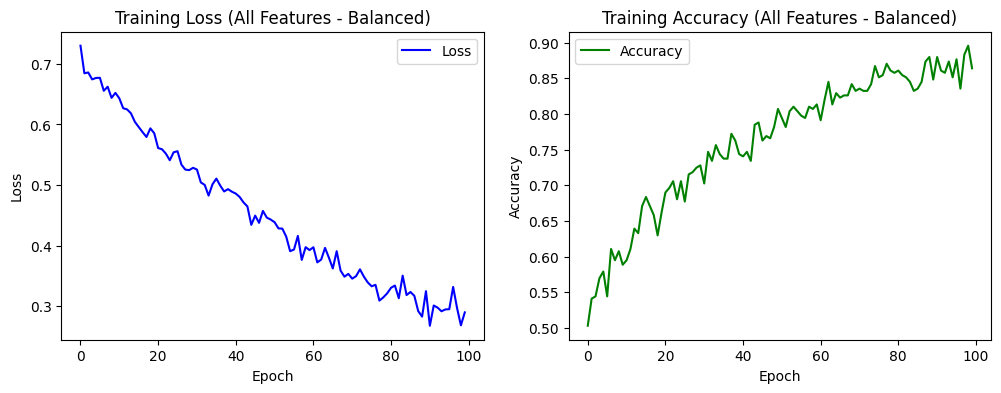

In [58]:
# Use the oversampled training set with all features (ADASYN balanced) for training
X_train = Xtrain_resampled
if not isinstance(X_train, np.ndarray):
    X_train = X_train.toarray()
y_train = ytrain_resampled  # labels for oversampled training set

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
input_dim_all = X_train_tensor.shape[1]  # should be same as previous input_dim_all

# Initialize a new network for this scenario
torch.manual_seed(122)
model = BreastCancerNN(input_dim_all)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 100
batch_size = 16
train_losses = []
train_accuracies = []

print("Training on all features (balanced classes with ADASYN)...")
for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0.0
    correct = 0
    total = X_train_tensor.size(0)
    for i in range(0, total, batch_size):
        X_batch = X_train_tensor[i:i+batch_size]
        y_batch = y_train_tensor[i:i+batch_size]
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item() * X_batch.size(0)
        preds = (outputs >= 0.5).int()
        correct += (preds == y_batch.int()).sum().item()
    epoch_loss /= total
    epoch_acc = correct / total
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_acc)
    if (epoch + 1) % 10 == 0 or epoch == 0:
        print(f"Epoch {epoch+1}/{num_epochs}: Loss = {epoch_loss:.4f}, Accuracy = {epoch_acc:.4f}")

# Evaluate on the original test set (all features)
X_test = Xtest_transformed
if not isinstance(X_test, np.ndarray):
    X_test = X_test.toarray()
y_test = ytest_encoded

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    test_preds = (test_outputs.numpy().flatten() >= 0.5).astype(int)

acc = accuracy_score(y_test, test_preds)
prec = precision_score(y_test, test_preds, average='weighted', zero_division=0)
rec = recall_score(y_test, test_preds, average='weighted', zero_division=0)
mcc = matthews_corrcoef(y_test, test_preds)
print("\nTest Metrics (All Features, Balanced with ADASYN):")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"MCC:       {mcc:.4f}")

plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Loss', color='blue')
plt.title('Training Loss (All Features - Balanced)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Accuracy', color='green')
plt.title('Training Accuracy (All Features - Balanced)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Save the model
best_nn_base_balanced = model


## Neural Network 3 | Data Contains Selected Features & Imbalanced Classes

Training on selected features (imbalanced classes)...
Epoch 1/100: Loss = 0.7381, Accuracy = 0.3640
Epoch 10/100: Loss = 0.6105, Accuracy = 0.7149
Epoch 20/100: Loss = 0.5455, Accuracy = 0.7412
Epoch 30/100: Loss = 0.5309, Accuracy = 0.7719
Epoch 40/100: Loss = 0.5173, Accuracy = 0.7500
Epoch 50/100: Loss = 0.4918, Accuracy = 0.7719
Epoch 60/100: Loss = 0.4606, Accuracy = 0.7895
Epoch 70/100: Loss = 0.4600, Accuracy = 0.8070
Epoch 80/100: Loss = 0.4728, Accuracy = 0.7851
Epoch 90/100: Loss = 0.4690, Accuracy = 0.7939
Epoch 100/100: Loss = 0.4650, Accuracy = 0.7939

Test Metrics (Selected Features, Imbalanced):
Accuracy:  0.6897
Precision: 0.6596
Recall:    0.6897
MCC:       0.1716


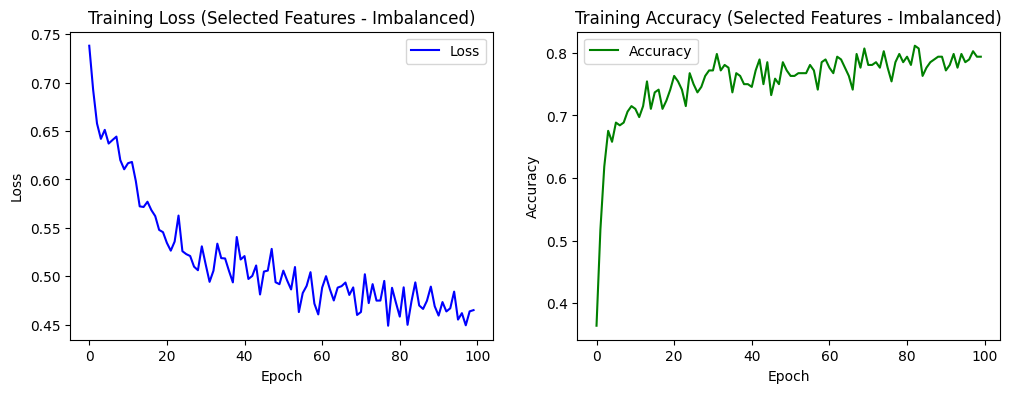

In [59]:
# Use the selected feature subset (statistically significant features), imbalanced classes
X_train = Xtrain_selected_transformed
if not isinstance(X_train, np.ndarray):
    X_train = X_train.toarray()
y_train = ytrain_encoded  # use original training labels (imbalanced)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
input_dim_selected = X_train_tensor.shape[1]  # number of selected features

torch.manual_seed(122)
model = BreastCancerNN(input_dim_selected)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 100
batch_size = 16
train_losses = []
train_accuracies = []

print("Training on selected features (imbalanced classes)...")
for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0.0
    correct = 0
    total = X_train_tensor.size(0)
    for i in range(0, total, batch_size):
        X_batch = X_train_tensor[i:i+batch_size]
        y_batch = y_train_tensor[i:i+batch_size]
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item() * X_batch.size(0)
        preds = (outputs >= 0.5).int()
        correct += (preds == y_batch.int()).sum().item()
    epoch_loss /= total
    epoch_acc = correct / total
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_acc)
    if (epoch + 1) % 10 == 0 or epoch == 0:
        print(f"Epoch {epoch+1}/{num_epochs}: Loss = {epoch_loss:.4f}, Accuracy = {epoch_acc:.4f}")

# Evaluate on test set (selected features)
X_test = Xtest_selected_transformed
if not isinstance(X_test, np.ndarray):
    X_test = X_test.toarray()
y_test = ytest_encoded

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    test_preds = (test_outputs.numpy().flatten() >= 0.5).astype(int)

acc = accuracy_score(y_test, test_preds)
prec = precision_score(y_test, test_preds, average='weighted', zero_division=0)
rec = recall_score(y_test, test_preds, average='weighted', zero_division=0)
mcc = matthews_corrcoef(y_test, test_preds)
print("\nTest Metrics (Selected Features, Imbalanced):")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"MCC:       {mcc:.4f}")

plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Loss', color='blue')
plt.title('Training Loss (Selected Features - Imbalanced)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Accuracy', color='green')
plt.title('Training Accuracy (Selected Features - Imbalanced)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Save the model
best_nn_selected = model

## Neural Network 4 | Data Contains Selected Features & Balanced Classes

Training on selected features (balanced classes with ADASYN)...
Epoch 1/100: Loss = 0.7447, Accuracy = 0.3713
Epoch 10/100: Loss = 0.6657, Accuracy = 0.5808
Epoch 20/100: Loss = 0.6153, Accuracy = 0.6557
Epoch 30/100: Loss = 0.5726, Accuracy = 0.6886
Epoch 40/100: Loss = 0.5654, Accuracy = 0.6557
Epoch 50/100: Loss = 0.5578, Accuracy = 0.6946
Epoch 60/100: Loss = 0.5650, Accuracy = 0.6916
Epoch 70/100: Loss = 0.5378, Accuracy = 0.7036
Epoch 80/100: Loss = 0.5385, Accuracy = 0.6886
Epoch 90/100: Loss = 0.5188, Accuracy = 0.7066
Epoch 100/100: Loss = 0.5321, Accuracy = 0.7186

Test Metrics (Selected Features, Balanced with ADASYN):
Accuracy:  0.6207
Precision: 0.6742
Recall:    0.6207
MCC:       0.2044


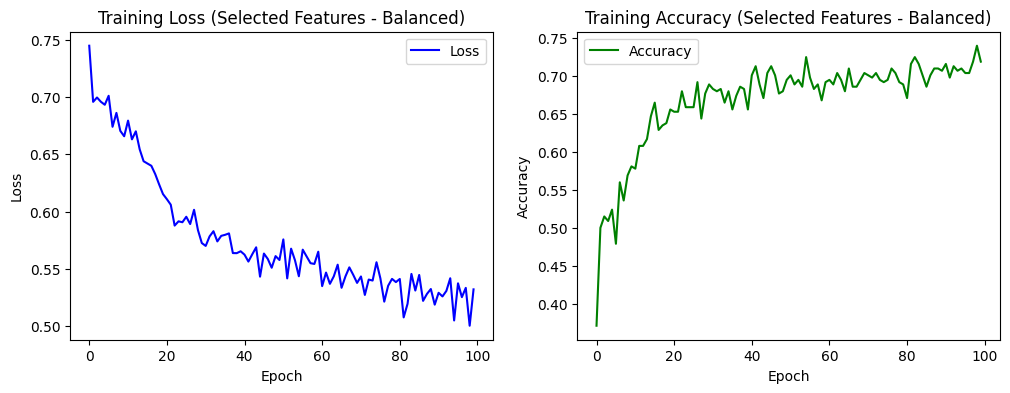

In [60]:
# Use the oversampled training set with selected features (ADASYN balanced)
X_train = Xtrain_selected_resampled
if not isinstance(X_train, np.ndarray):
    X_train = X_train.toarray()
y_train = ytrain_selected_resampled

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
input_dim_selected = X_train_tensor.shape[1]

torch.manual_seed(122)
model = BreastCancerNN(input_dim_selected)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 100
batch_size = 16
train_losses = []
train_accuracies = []

print("Training on selected features (balanced classes with ADASYN)...")
for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0.0
    correct = 0
    total = X_train_tensor.size(0)
    for i in range(0, total, batch_size):
        X_batch = X_train_tensor[i:i+batch_size]
        y_batch = y_train_tensor[i:i+batch_size]
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item() * X_batch.size(0)
        preds = (outputs >= 0.5).int()
        correct += (preds == y_batch.int()).sum().item()
    epoch_loss /= total
    epoch_acc = correct / total
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_acc)
    if (epoch + 1) % 10 == 0 or epoch == 0:
        print(f"Epoch {epoch+1}/{num_epochs}: Loss = {epoch_loss:.4f}, Accuracy = {epoch_acc:.4f}")

# Evaluate on test set (selected features)
X_test = Xtest_selected_transformed
if not isinstance(X_test, np.ndarray):
    X_test = X_test.toarray()
y_test = ytest_encoded

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    test_preds = (test_outputs.numpy().flatten() >= 0.5).astype(int)

acc = accuracy_score(y_test, test_preds)
prec = precision_score(y_test, test_preds, average='weighted', zero_division=0)
rec = recall_score(y_test, test_preds, average='weighted', zero_division=0)
mcc = matthews_corrcoef(y_test, test_preds)
print("\nTest Metrics (Selected Features, Balanced with ADASYN):")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"MCC:       {mcc:.4f}")

plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Loss', color='blue')
plt.title('Training Loss (Selected Features - Balanced)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Accuracy', color='green')
plt.title('Training Accuracy (Selected Features - Balanced)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Save the model
best_nn_selected_balanced = model

# Discussion

In [63]:
# select the best model from different algorithms
best_tree = trees['Selected Features_Imbalanced']
best_logreg = logistic['Selected Features_Imbalanced']
best_nb = nb['Selected Features_Imbalanced']
best_knn = knn['Selected Features_Imbalanced']
#best_forest = forest['Selected Features_Imbalanced']

# summaryTable = pd.concat([best_tree, best_logreg, best_nb, best_knn, best_forest], axis=1)
# summaryTable.columns = columns=['Decision Tree','Logistic Regression', 'Naive Bayes', 'KNearestNeighbors', 'Random Forest']
summaryTable = pd.concat([best_tree, best_logreg, best_nb, best_knn], axis=1)
summaryTable.columns = columns=['Decision Tree','Logistic Regression', 'Naive Bayes', 'KNearestNeighbors']
display(summaryTable)

,Decision Tree,Logistic Regression,Naive Bayes,KNearestNeighbors
Accuracy,0.724138,0.741379,0.689655,0.706897
Precision,0.701327,0.720431,0.725894,0.669655
Recall,0.724138,0.741379,0.689655,0.706897
F1_Score,0.703986,0.707617,0.700681,0.668632
MCC,0.268203,0.291658,0.329748,0.181813


1. **Feature Set Impact:**
   - The models consistently performed best when trained on a selected feature set without the need for data resampling to balance the classes of no recurrence and breast cancer recurrence events. This suggests that feature selection plays a crucial role in model performance.

2. **Algorithm Comparison:**
   - Among the five algorithms (Decision Tree, Logistic Regression, Naive Bayes, KNearestNeighbors, Random Forest), KNearestNeighbors stands out with the highest metrics across accuracy, precision, recall, F1 score, and MCC. Its performance is notably superior compared to the other models.

3. **Confusion Matrix Insight:**
   - Despite KNearestNeighbors having the highest overall metrics, further examination of the confusion matrix reveals that it might not be the optimal model for identifying breast cancer recurrence events. Naive Bayes outperforms other models in correctly identifying recurrence events, as indicated by a normalized value of 0.65.

4. **Resampling Effectiveness:**
   - The observation suggests that re-sampling techniques, specifically adaptive synthetic resampling (ADASYN) implementing in this analysis, do not necessarily lead to improved model performance. In this analysis, the models trained on the imbalanced dataset without re-sampling achieved competitive results.

5. **Feature Selection Advantage:**
   - Feature selection, based on the statistical analysis of feature-target associations, consistently proves beneficial in enhancing model performance. This finding underscores the importance of selecting relevant features for breast cancer recurrence prediction.

In conclusion, while KNearestNeighbors demonstrates overall superior performance, Naive Bayes emerges as the most effective model in correctly identifying breast cancer recurrence events. The analytical insights also emphasize the critical role of feature selection in optimizing predictive modeling for breast cancer recurrence.

# Future Directions

Some future directions to explore for improving the model performance:

1. **Ensemble Methods:**
   - Investigate the use of ensemble methods such as bagging (Bootstrap Aggregating) or boosting to combine predictions from multiple models. Ensemble methods often lead to improved generalization and robustness.

2. **Advanced Resampling Techniques:**
   - Explore alternative resampling techniques beyond ADASYN. Methods like SMOTE (Synthetic Minority Over-sampling Technique) or Borderline-SMOTE might yield different results in addressing class imbalance.

3. **Feature Engineering:**
   - Experiment with creating new features or transforming existing ones to capture additional information. Domain-specific insights could guide the creation of features that better represent the underlying patterns in the data.

4. **Algorithmic Diversity:**
   - Include a wider range of algorithms in the analysis. Consider exploring gradient boosting, support vector machines, or neural networks, as they might capture complex relationships in the data that other algorithms might miss.

5. **Domain Expert Collaboration:**
   - Collaborate with domain experts, oncologists, or researchers in breast cancer to gain insights into specific features or patterns that may not be apparent from the data alone. This collaboration can inform the selection of relevant features and improve model interpretability.